## Exploratory Data Analysis Basic Questions

<i>Here, some exploratory data analysis was done based on the questions below:

- What is the distribution of number of passengers per trip?
- What is the distribution of payment_type?
- What is the distribution of fare amount?
- What is the distribution of tip amount?
- What is the distribution of total amount?
- What are top 5 busiest hours of the day?
- What are the top 10 busiest locations of the city?
- Which trip has the highest standard deviation of travel time?
- Which trip has most consistent fares? 


Open Questions

- In what trips can you confidently use respective means as measures of central tendency to estimate fare, time taken, etc.
- Can we build a model to predict fare and tip amount given pick up and drop off coordinates, time of day and week?
- If you were a taxi owner, how would you maximize your earnings in a day?
- If you were a taxi owner, how would you minimize your work time while retaining the average wages earned by a typical taxi in the dataset?
- If you run a taxi company with 10 taxis, how would you maximize your earnings?
    
</i>

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sqlite3
from scipy.stats.mstats import winsorize
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.cm

#from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df_data = pd.read_csv("Copy of trip_data_4.csv")
df_data.columns = df_data.columns.str.replace(' ', '')


del df_data['Unnamed:0']

df_data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082


In [2]:
df_data['pickup_datetime'] = pd.to_datetime(df_data['pickup_datetime'], format='%Y-%m-%d')


In [3]:
df_fare = pd.read_csv("Copy of trip_fare_4.csv")
df_fare.columns = df_fare.columns.str.replace(' ', '')


del df_fare['Unnamed:0']

df_fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.0,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.0,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.0,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.0,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.0,19.20


In [4]:
df_fare['pickup_datetime'] = pd.to_datetime(df_fare['pickup_datetime'], format='%Y-%m-%d')


### Joining the two dataframes (Trip data and Fare data) Using pandas Merge

In [5]:
df = pd.merge(df_data, df_fare,  how='inner', left_on=['medallion','hack_license','vendor_id','pickup_datetime'], right_on = ['medallion','hack_license','vendor_id','pickup_datetime'])
df.columns = df.columns.str.replace(' ', '')
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648,CRD,11.0,1.0,0.5,2.50,0.0,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000,CRD,8.5,0.0,0.5,1.80,0.0,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374,CRD,16.5,1.0,0.5,3.60,0.0,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642,CRD,10.0,1.0,0.5,3.45,0.0,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082,CRD,15.0,0.5,0.5,3.20,0.0,19.20


In [6]:
df.shape

(1000018, 21)

Using the data dictionary here: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

- Rate Code 1 = Standard City Rate
- Rate Code 2 = JFK Airport Rate
- Rate Code 3 = La Guardia Airport Rate
- Rate Code 4 = Westchester/Nassau County Rates
- Rate Code 5 = Out of City Rate with negotiated flat fare
- Rate Code 6 = Group Ride

In [7]:
df['rate_code'].value_counts(normalize=True)*100


1    97.876838
2     1.614971
5     0.271095
3     0.148797
4     0.082699
0     0.004200
6     0.001400
Name: rate_code, dtype: float64

We can see here that Standard City Rate dominates the rate code, which indicates that more trips are within the city more 
than anywhere else

### What is the distribution of number of passengers per trip?

In [8]:
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
df['passenger_count'].value_counts()

1    685427
2    136508
5     66423
3     44837
6     44476
4     22345
0         2
Name: passenger_count, dtype: int64

/opt/miniconda3/envs/pycaret/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


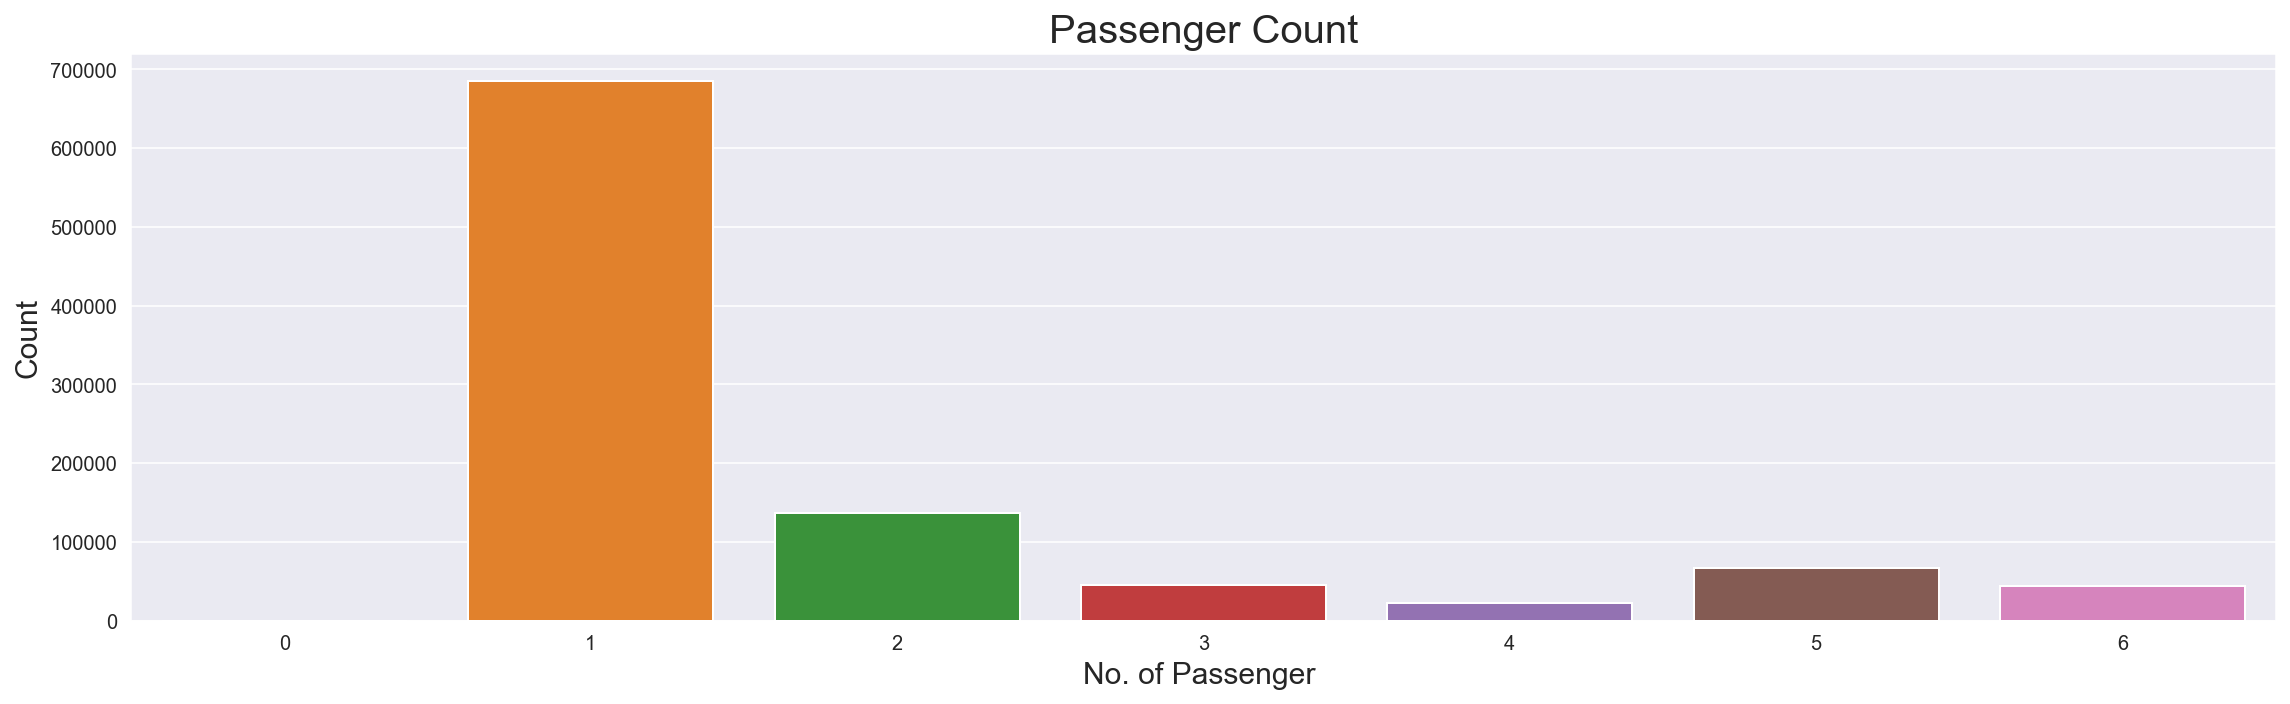

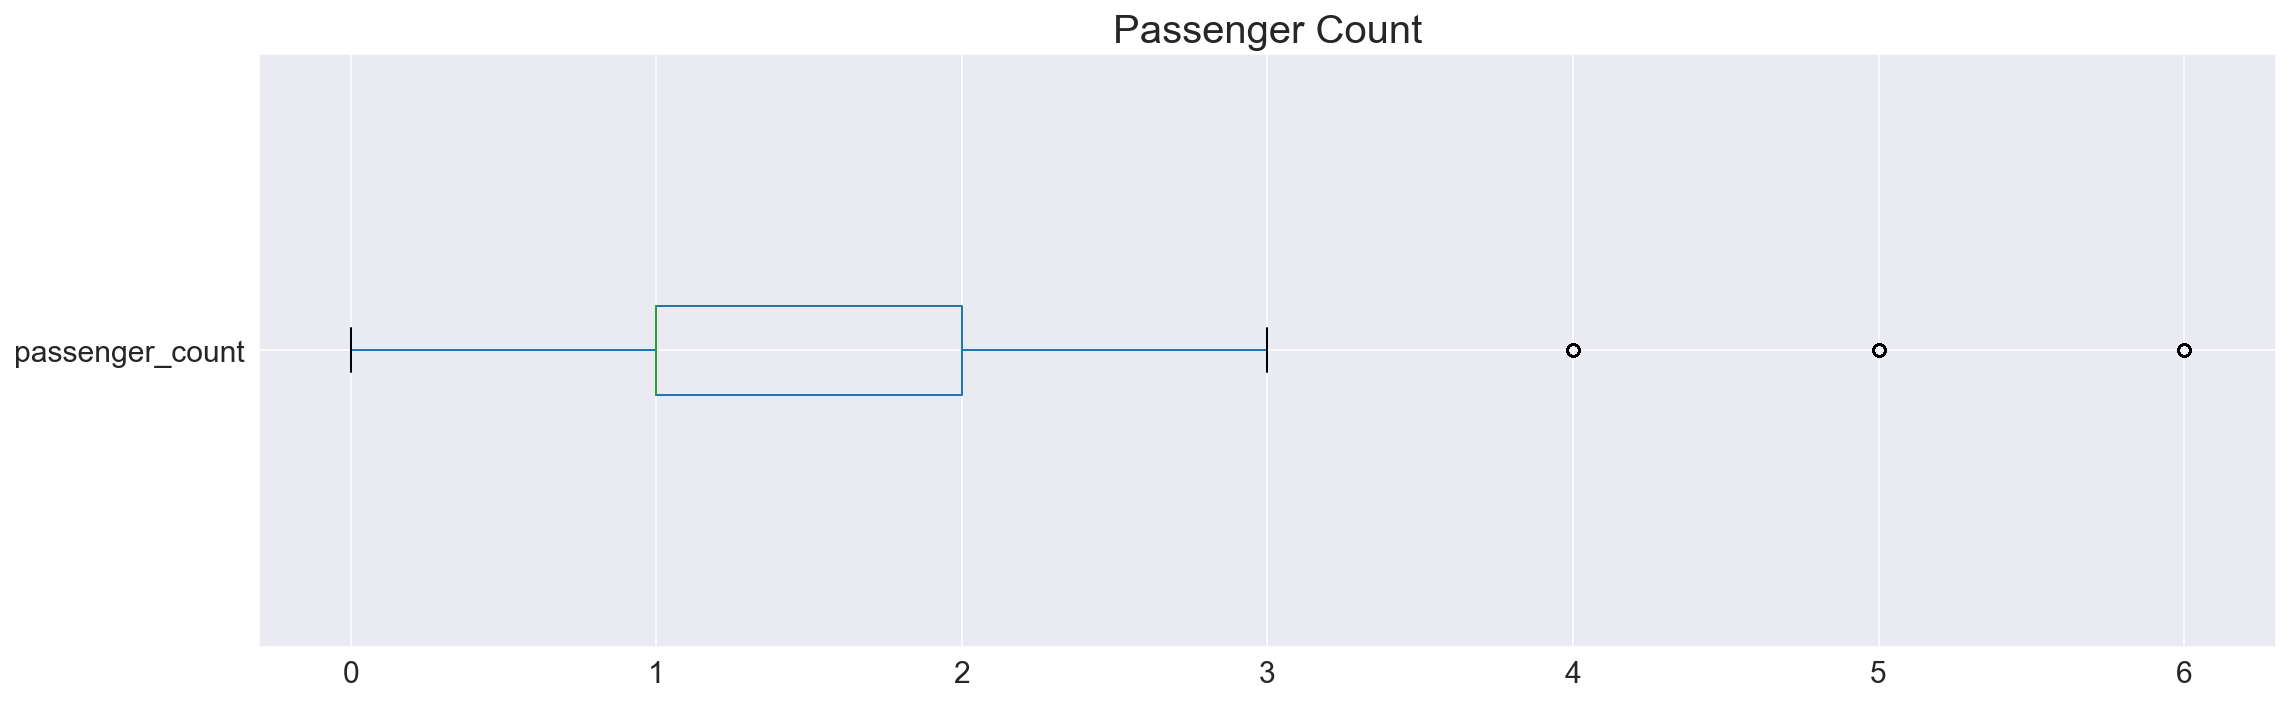

In [9]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
# line = df['passenger_count'].value_counts().plot(kind='bar',fontsize = 15)
line = sns.countplot(df['passenger_count'])
line.set_ylabel("Count",fontsize = 15)
line.set_xlabel("No. of Passenger ",fontsize = 15)
line.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
box = df['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()

Here, we can see that a one passenger trip dominates the dataset, which is immediately followed by a two passenger trip.

### What is the distribution of payment_type?

In [10]:
a = df['payment_type'].value_counts(normalize=True)
a = a.to_frame().reset_index()
a = a.rename(columns={'index':'Type', 'payment_type':'Frequency'})
a_df = a
a_df

,Type,Frequency
0,CRD,0.52
1,CSH,0.48
2,NOC,0.00
3,DIS,0.00
4,UNK,0.00


In [11]:
a_df = a_df.replace('CRD','Credit Card')
a_df = a_df.replace('CSH','Cash')
#a_df = a_df.replace('NOC','No Charge')
#a_df = a_df.replace('DIS', 'Dispute')
#a_df = a_df.replace('UNK','Unknown')
a_df.set_index('Type', inplace=True)

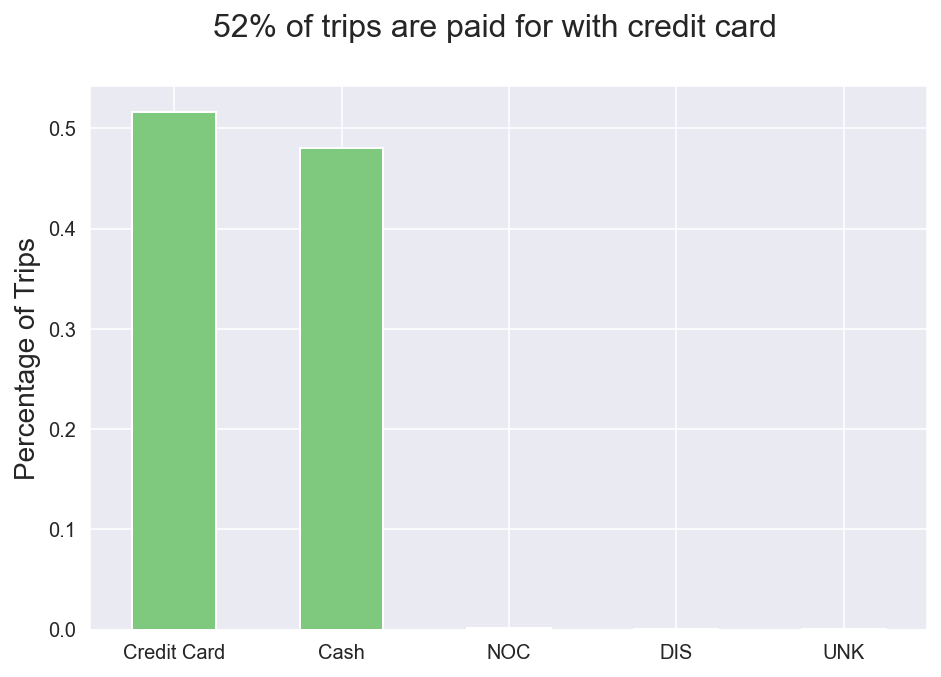

In [12]:
fig, ax = plt.subplots(figsize=(7.5,5))
ax = a_df.plot(kind='bar', cmap='Accent', legend=False, rot=0, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Trips', fontsize=14)
fig.suptitle('52% of trips are paid for with credit card', fontsize=16)
plt.ticklabel_format(style='plain', axis='y')


From the table and bar graph above, we can see that the proportion of the use of credit cards and cash accounts for 100 percent of payment types

### What is the distribution of fare amount?

In [13]:
df_fare['fare_amount'].describe()

count   1000000.00
mean         12.25
std           9.89
min           2.50
25%           6.50
50%           9.50
75%          14.00
max         385.00
Name: fare_amount, dtype: float64

/opt/miniconda3/envs/pycaret/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


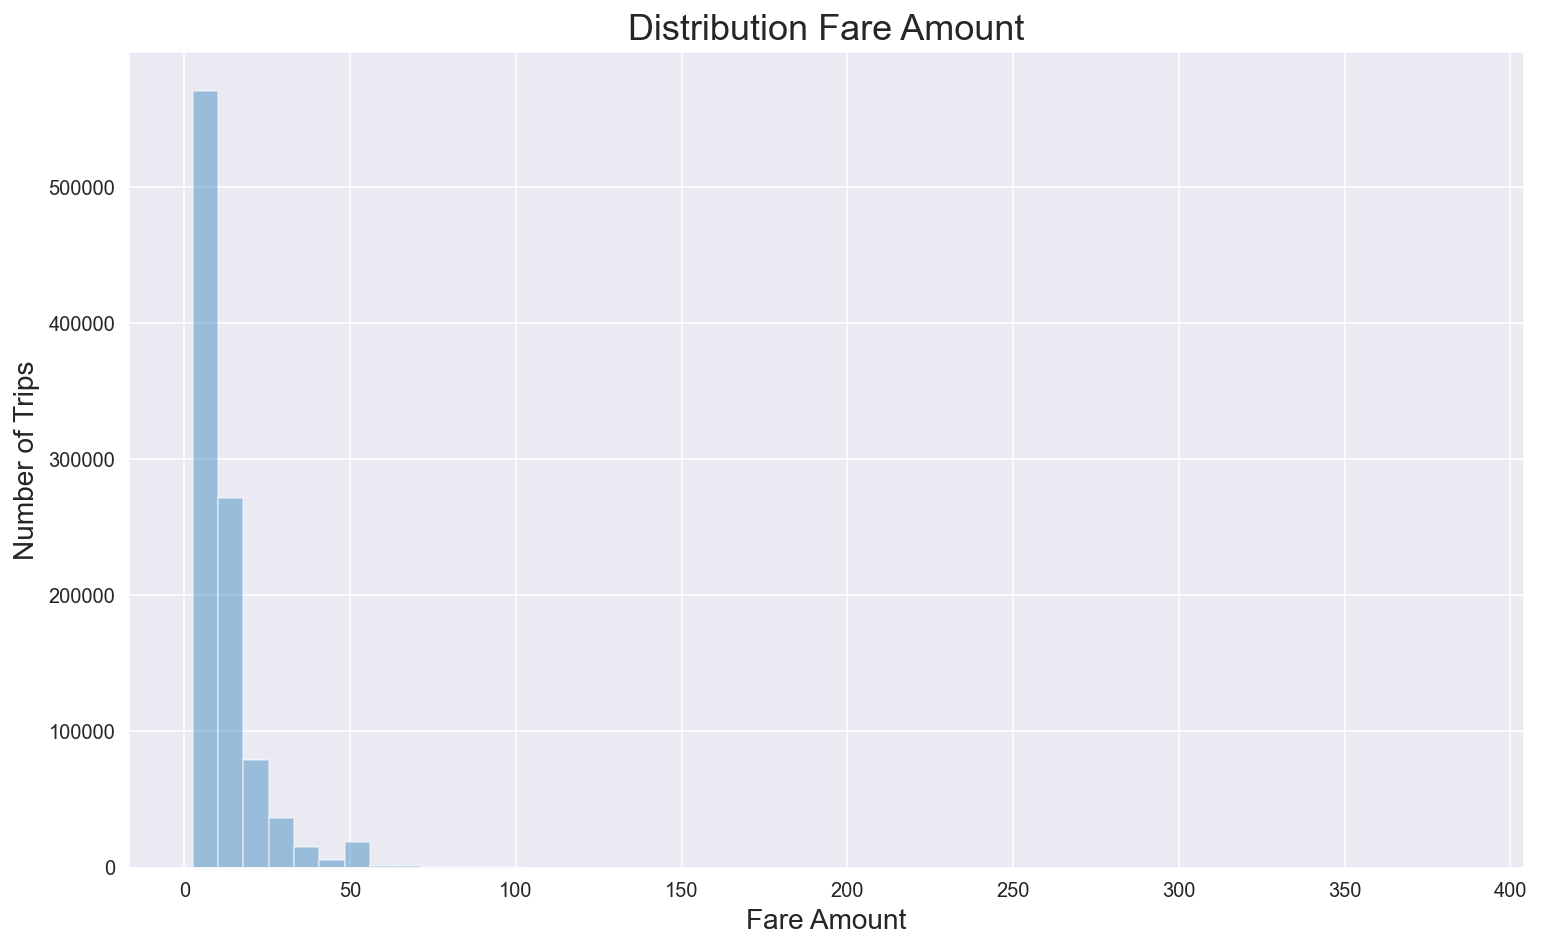

In [14]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(df_fare['fare_amount'], kde=False)
#ax.axvline(fare_amt_median, lw=2.5, ls='dashed', color='black')
#ax.axvline(fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
#ax.axvline(fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution Fare Amount', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

From the bar graph, we can see that majority of the fares are between 0 to 25 dollars and the highest price is just a little bit over $50. This makes sense in a real life situation given that majority of the trips are just standard city trips as seen in the rate code analysis above

### Airport Fare

In [15]:
airport_fare  = df.copy()
airport_fare = df[df['rate_code'] != 1]
airport_fare.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
53,E8B6C24CA6EE4ED994B038DCD633B58D,B399C414BBA8A171A0C977DBCD0D61B0,CMT,2,N,2013-04-05 06:37:17,2013-04-05 07:18:27,1,2470,18.20,-73.78,40.65,-73.99,40.76,CRD,52.00,0.00,0.50,11.56,5.33,69.39
55,AB6D4655958A45070F457B21CC1F215C,03C944FD6B403C6DED40206A43A3808F,CMT,2,N,2013-04-05 05:35:45,2013-04-05 06:03:27,1,1661,18.90,-74.00,40.74,-73.79,40.64,CRD,52.00,0.00,0.50,10.50,0.00,63.00
239,878C0F5D806D720CBFB0EA42FD7FC172,1DF12E1796FCA5041F6F0F17F6A8D045,VTS,2,NaN,2013-04-12 17:41:00,2013-04-12 18:36:00,1,3300,19.58,-73.78,40.65,-74.00,40.72,CRD,52.00,0.00,0.50,10.40,5.33,68.23
377,1431E056A35F588107E3BC378BB6B350,1BF3CE47ECE4C2B61C36990EDAEE7CC2,VTS,5,NaN,2013-04-12 20:16:00,2013-04-12 20:16:00,2,0,0.00,0.00,0.00,0.00,0.00,CRD,120.00,0.00,0.00,0.00,0.00,120.00
446,AF654FCA5D10F5E1A223479B11D3967F,5384E516808D8ED51E2F8C6A9404BA1C,VTS,2,NaN,2013-04-12 23:24:00,2013-04-12 23:50:00,1,1560,7.12,-73.99,40.74,-74.05,40.72,CRD,52.00,0.00,0.50,10.40,10.25,73.15


/opt/miniconda3/envs/pycaret/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


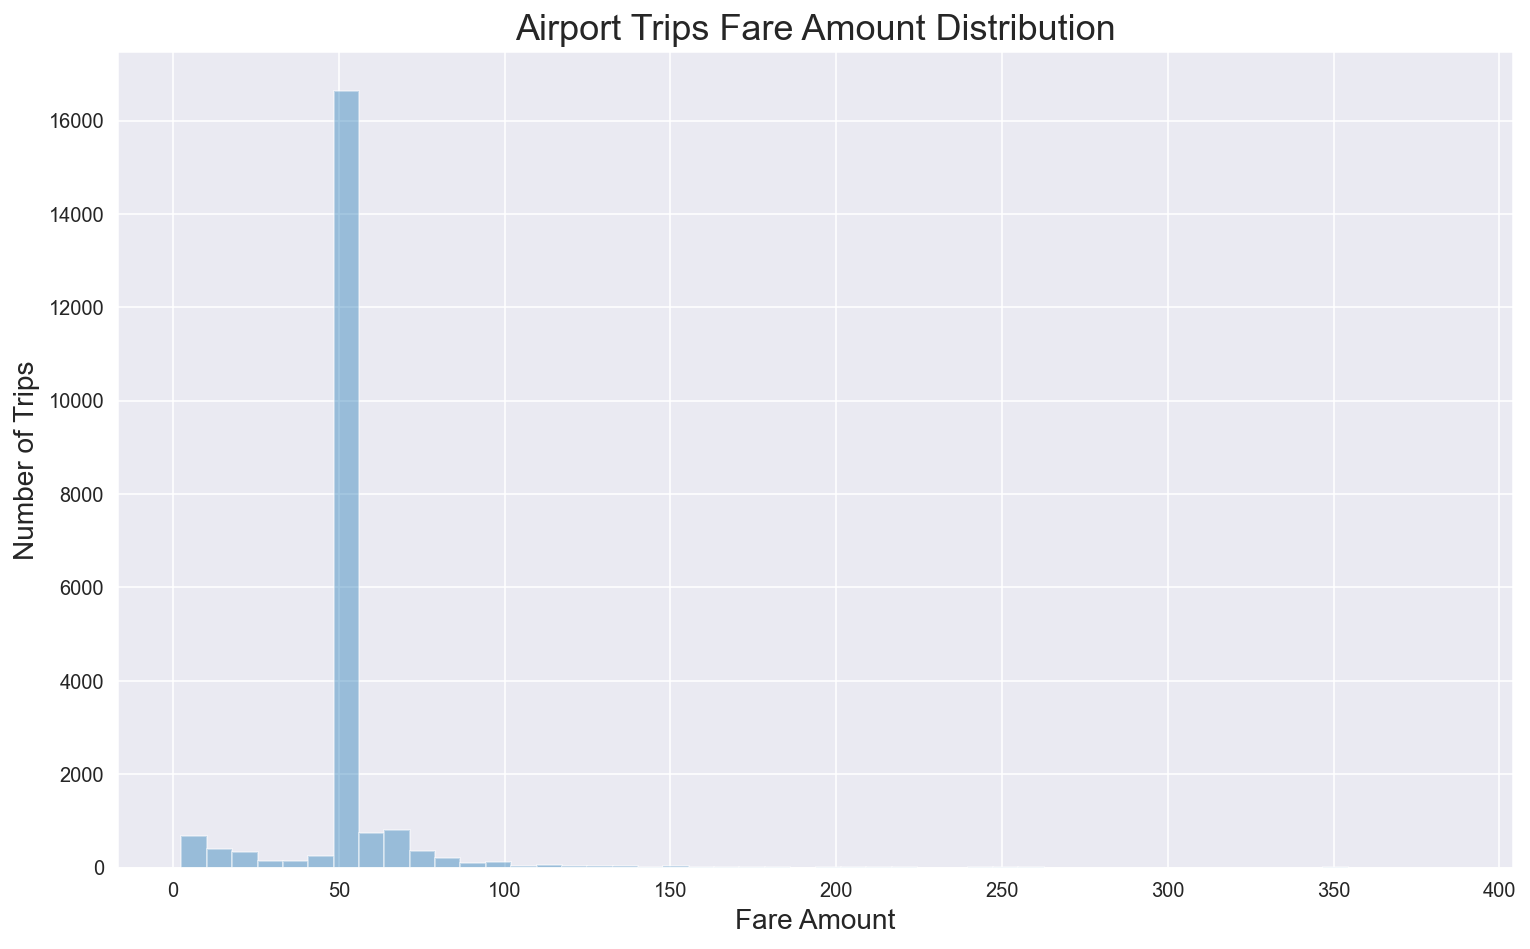

In [16]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(airport_fare['fare_amount'], kde=False)
ax.set_title('Airport Trips Fare Amount Distribution', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

Looking at the airpot trips in the bar graph above, we can see that they are quite pricier than the standard city trips. This makes sense cos most airports are located far away from the city central which makes the trip longer and thus affects the fare amount

### Winzorising the airport fare amount

In [17]:
winsorized_airport_fare_amt = winsorize(airport_fare['fare_amount'], limits=[0.01, 0.01])
airport_fare_amt_median = np.median(winsorized_airport_fare_amt)

airport_fare_amt_lower = stats.scoreatpercentile(winsorized_airport_fare_amt, 5)
airport_fare_amt_upper = stats.scoreatpercentile(winsorized_airport_fare_amt, 95)

print(airport_fare_amt_lower, airport_fare_amt_median, airport_fare_amt_upper)

17.5 52.0 72.5


/opt/miniconda3/envs/pycaret/lib/python3.6/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


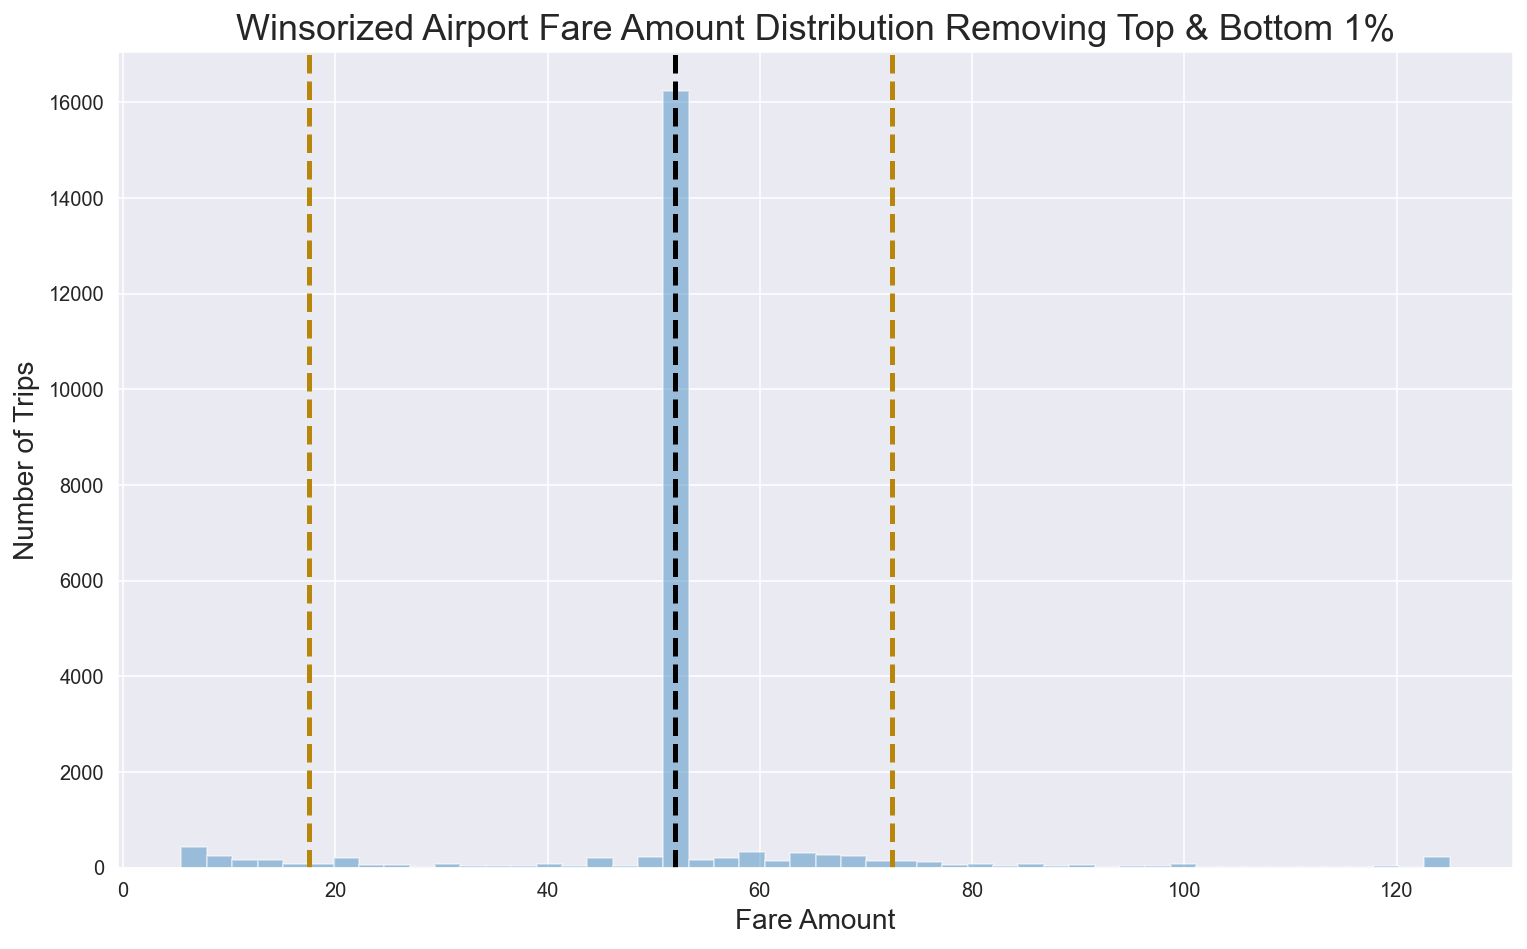

In [18]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_airport_fare_amt, kde=False)
ax.axvline(airport_fare_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(airport_fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(airport_fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Winsorized Airport Fare Amount Distribution Removing Top & Bottom 1%', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

Winsorizing the fare amount data by removing the top and bottom 1% shows the median fare amount is 18 dollars as shown above. The bottom 5% of fare amounts is less than $20 while the top 95% of fares is higher than 70 dolars.

### Non Airport Fare

In [19]:
nonairport_fare  = df.copy()
nonairport_fare = df[df['rate_code'] == 1]
nonairport_fare.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.50,-73.96,40.77,-73.98,40.79,CRD,11.00,1.00,0.50,2.50,0.00,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.60,0.00,0.00,0.00,0.00,CRD,8.50,0.00,0.50,1.80,0.00,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.60,-73.98,40.75,-74.01,40.72,CRD,16.50,1.00,0.50,3.60,0.00,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.90,-73.98,40.76,-73.96,40.78,CRD,10.00,1.00,0.50,3.45,0.00,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.60,-74.01,40.74,-73.96,40.76,CRD,15.00,0.50,0.50,3.20,0.00,19.20


/opt/miniconda3/envs/pycaret/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


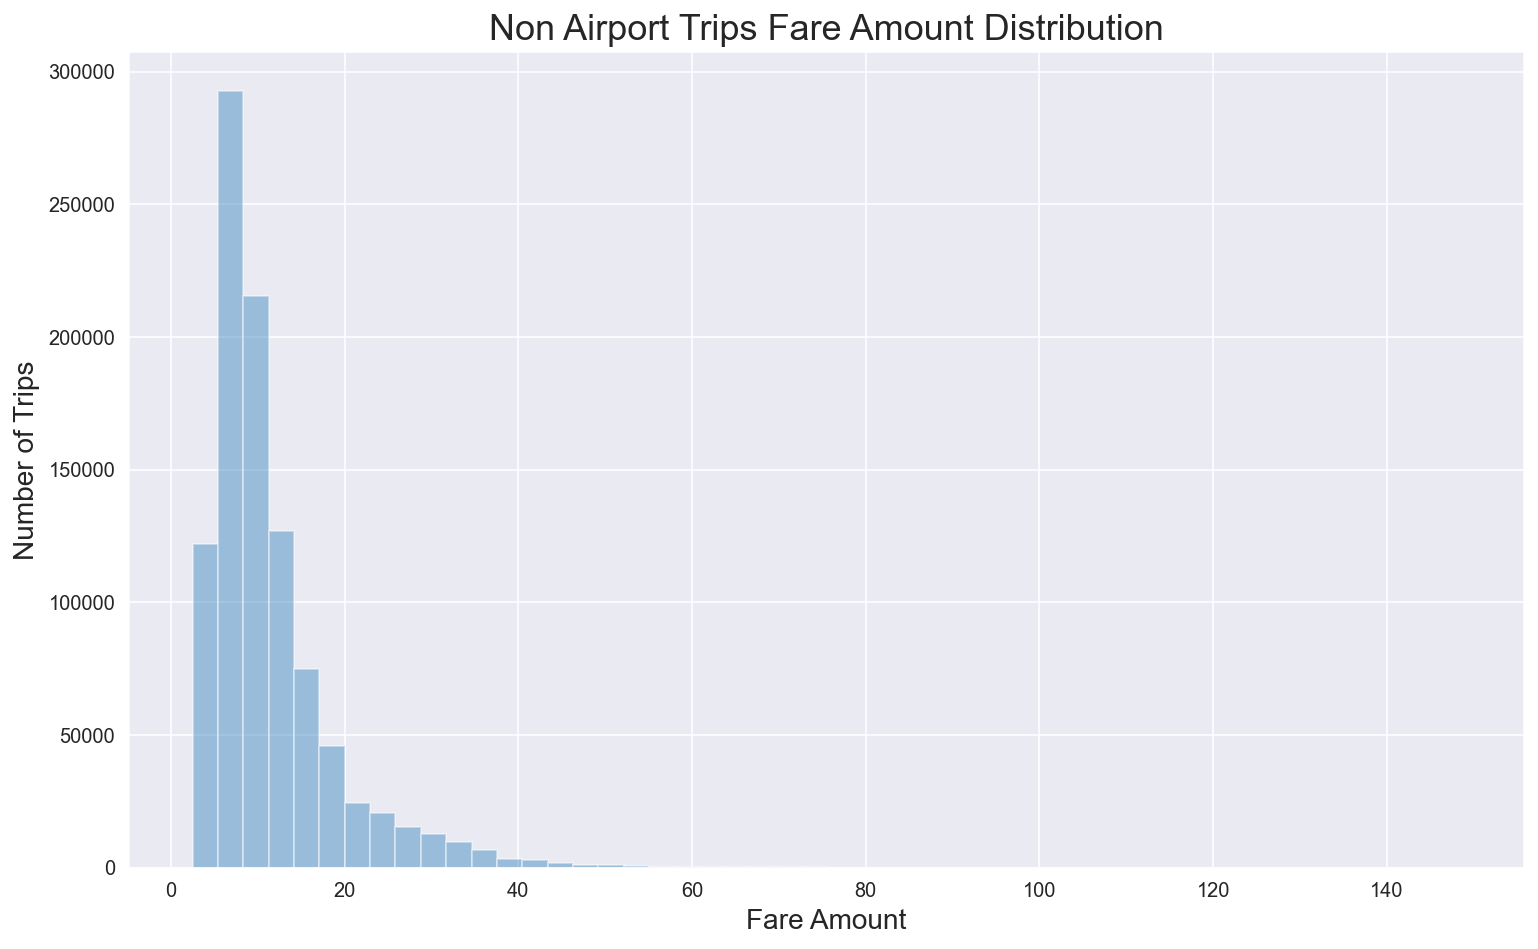

In [20]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(nonairport_fare['fare_amount'], kde=False)
ax.set_title('Non Airport Trips Fare Amount Distribution', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

From the bar graph above, majority of the trip fares are between 0-20 dollars in contrast to airport fares above

### Winzorising the non-airport fare amount


In [21]:
winsorized_nonairport_fare_amt = winsorize(nonairport_fare['fare_amount'], limits=[0.01, 0.01])
nonairport_fare_amt_median = np.median(winsorized_nonairport_fare_amt)

nonairport_fare_amt_lower = stats.scoreatpercentile(winsorized_nonairport_fare_amt, 5)
nonairport_fare_amt_upper = stats.scoreatpercentile(winsorized_nonairport_fare_amt, 95)

print(nonairport_fare_amt_lower, nonairport_fare_amt_median, nonairport_fare_amt_upper)

4.5 9.0 27.0


/opt/miniconda3/envs/pycaret/lib/python3.6/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


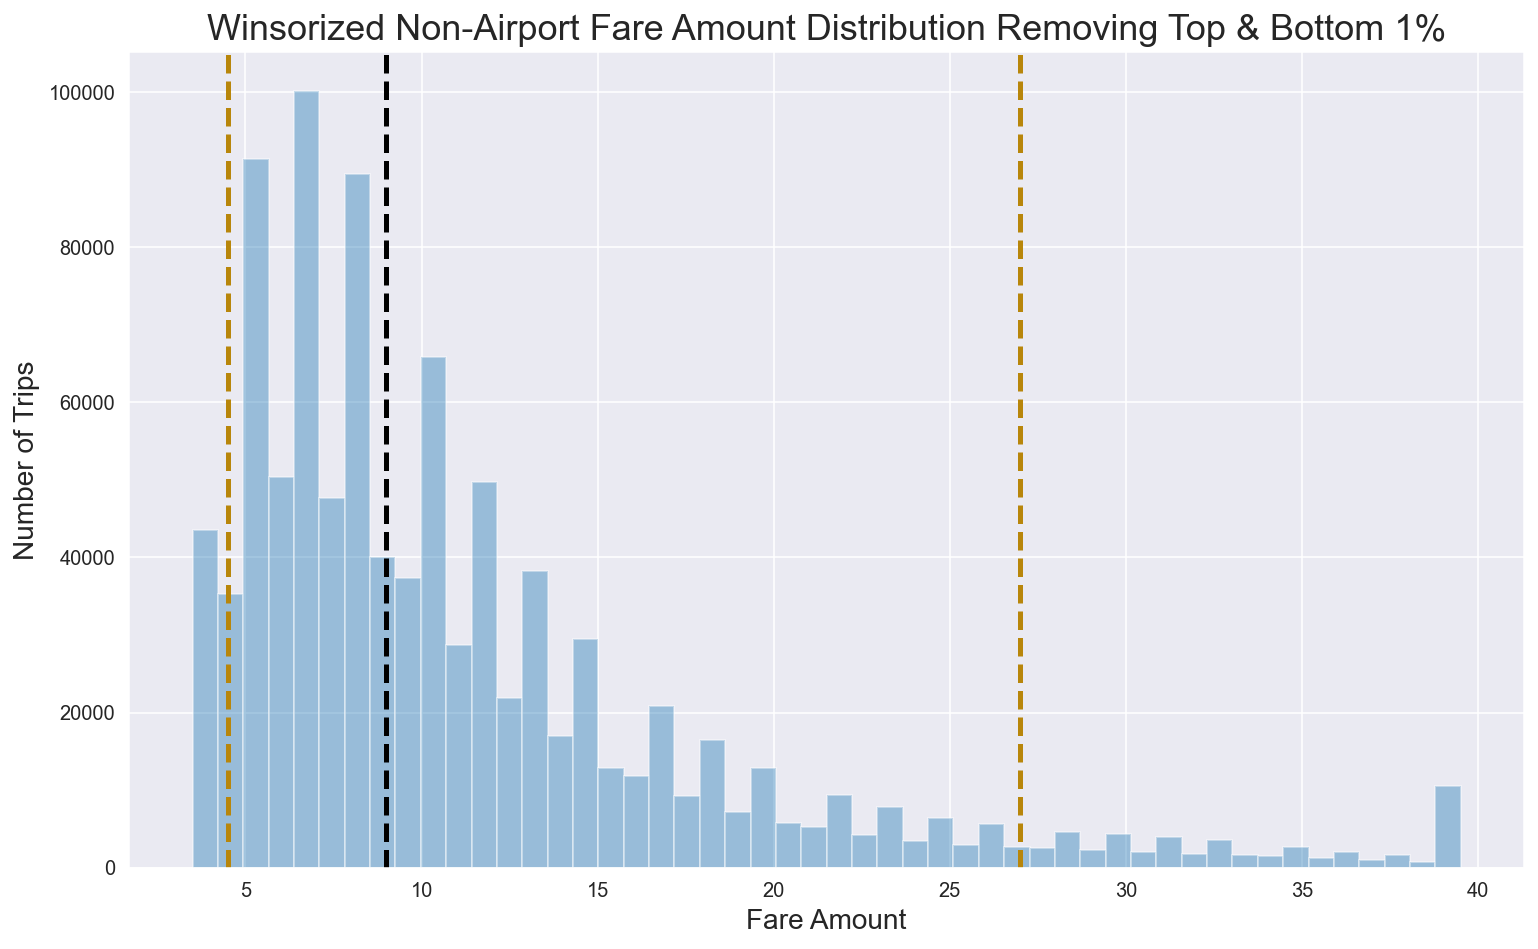

In [22]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_nonairport_fare_amt, kde=False)
ax.axvline(nonairport_fare_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(nonairport_fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(nonairport_fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Winsorized Non-Airport Fare Amount Distribution Removing Top & Bottom 1%', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

Winsorizing the fare amount data for non airport trips by removing the top and bottom 1% shows the median fare amount is around 8 dollars as shown above. The bottom 5% of fare amounts is less than $5 while the top 95% of fares is higher than 25 dollars.

### Comparisons between the two types of trips

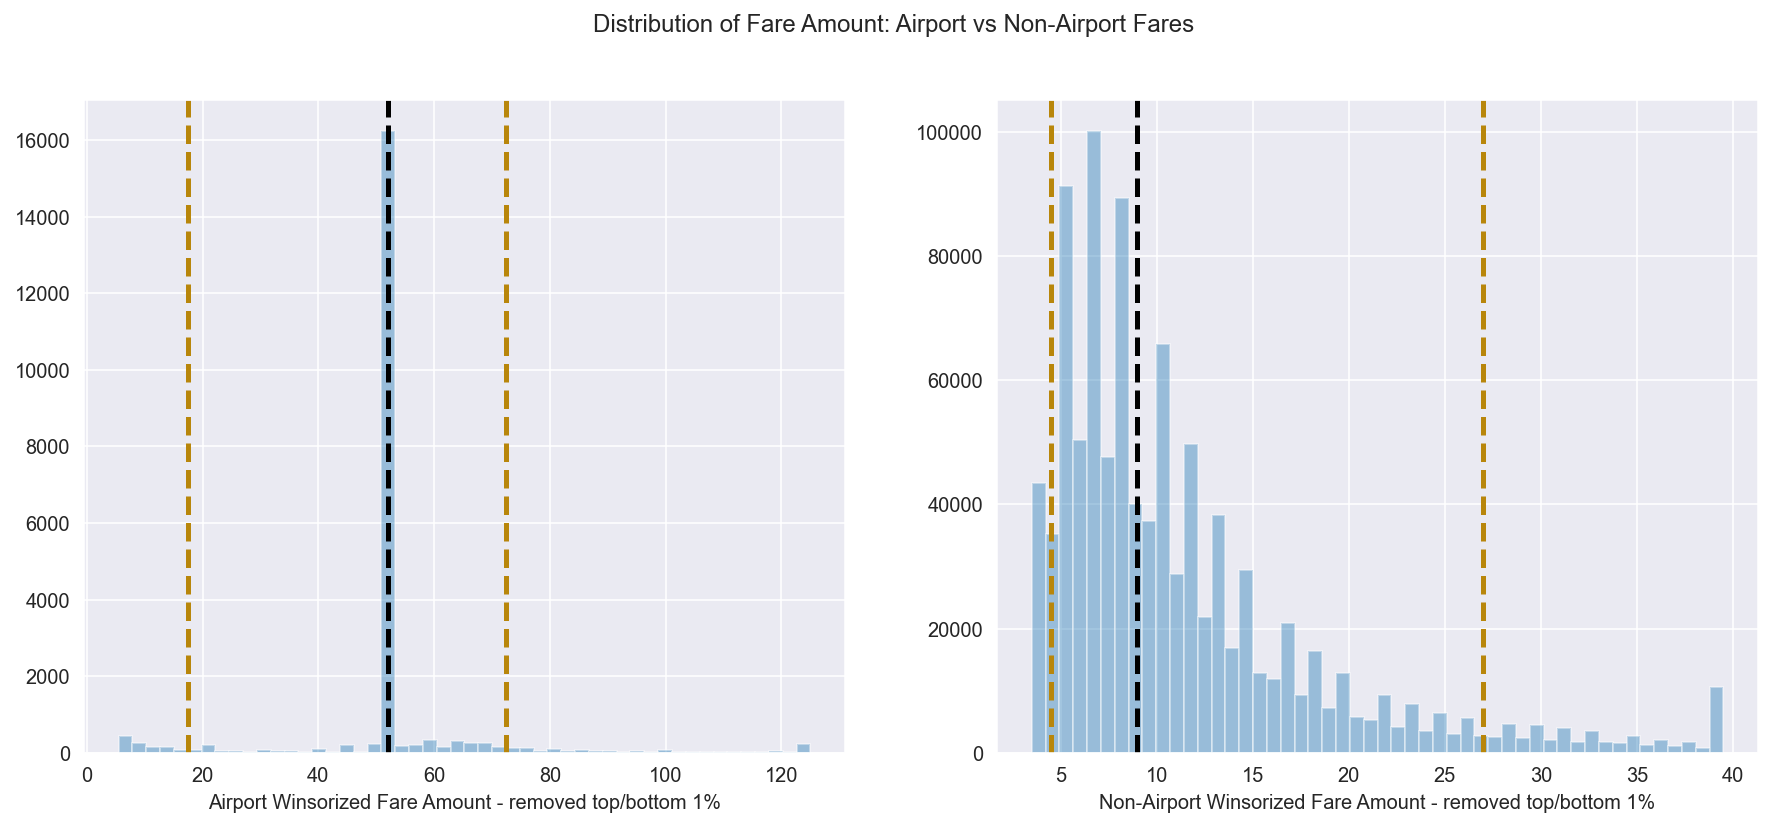

In [23]:
(fig, ax) = plt.subplots(1,2, figsize=(15,6))
ax[0] = sns.distplot(winsorized_airport_fare_amt, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[0].axvline(airport_fare_amt_median, lw=2.5, ls='dashed', color='black')
ax[0].axvline(airport_fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].axvline(airport_fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1] = sns.distplot(winsorized_nonairport_fare_amt, ax=ax[1], kde=False)
ax[1].axvline(nonairport_fare_amt_median, lw=2.5, ls='dashed', color='black')
ax[1].axvline(nonairport_fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1].axvline(nonairport_fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].set_xlabel('Airport Winsorized Fare Amount - removed top/bottom 1%')
ax[1].set_xlabel('Non-Airport Winsorized Fare Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Fare Amount: Airport vs Non-Airport Fares')
None

In [24]:
# What is the mode?
airport_fare['fare_amount'].mode()

0   52.00
dtype: float64

In [25]:
airport_fare['fare_amount'].median()

52.0

In [26]:
most_common_airport_fare = airport_fare.copy()
most_common_airport_fare = most_common_airport_fare[most_common_airport_fare['fare_amount'] == 52.0]
most_common_airport_fare.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
53,E8B6C24CA6EE4ED994B038DCD633B58D,B399C414BBA8A171A0C977DBCD0D61B0,CMT,2,N,2013-04-05 06:37:17,2013-04-05 07:18:27,1,2470,18.20,-73.78,40.65,-73.99,40.76,CRD,52.00,0.00,0.50,11.56,5.33,69.39
55,AB6D4655958A45070F457B21CC1F215C,03C944FD6B403C6DED40206A43A3808F,CMT,2,N,2013-04-05 05:35:45,2013-04-05 06:03:27,1,1661,18.90,-74.00,40.74,-73.79,40.64,CRD,52.00,0.00,0.50,10.50,0.00,63.00
239,878C0F5D806D720CBFB0EA42FD7FC172,1DF12E1796FCA5041F6F0F17F6A8D045,VTS,2,NaN,2013-04-12 17:41:00,2013-04-12 18:36:00,1,3300,19.58,-73.78,40.65,-74.00,40.72,CRD,52.00,0.00,0.50,10.40,5.33,68.23
446,AF654FCA5D10F5E1A223479B11D3967F,5384E516808D8ED51E2F8C6A9404BA1C,VTS,2,NaN,2013-04-12 23:24:00,2013-04-12 23:50:00,1,1560,7.12,-73.99,40.74,-74.05,40.72,CRD,52.00,0.00,0.50,10.40,10.25,73.15
557,4235B84E89BCBDF56662F123DF30111B,BA3141A26DE0E38CAC144C885695F46A,VTS,2,NaN,2013-04-12 20:55:00,2013-04-12 21:26:00,6,1860,18.83,-73.78,40.64,-73.98,40.78,CRD,52.00,0.00,0.50,13.00,0.00,65.50


In [27]:
# How did most passengers choose to pay this?
most_common_airport_fare['payment_type'].value_counts(normalize=True)

CRD   0.61
CSH   0.38
NOC   0.01
DIS   0.00
UNK   0.00
Name: payment_type, dtype: float64

### What is the distribution of tip amount?

#### All Tips

/opt/miniconda3/envs/pycaret/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


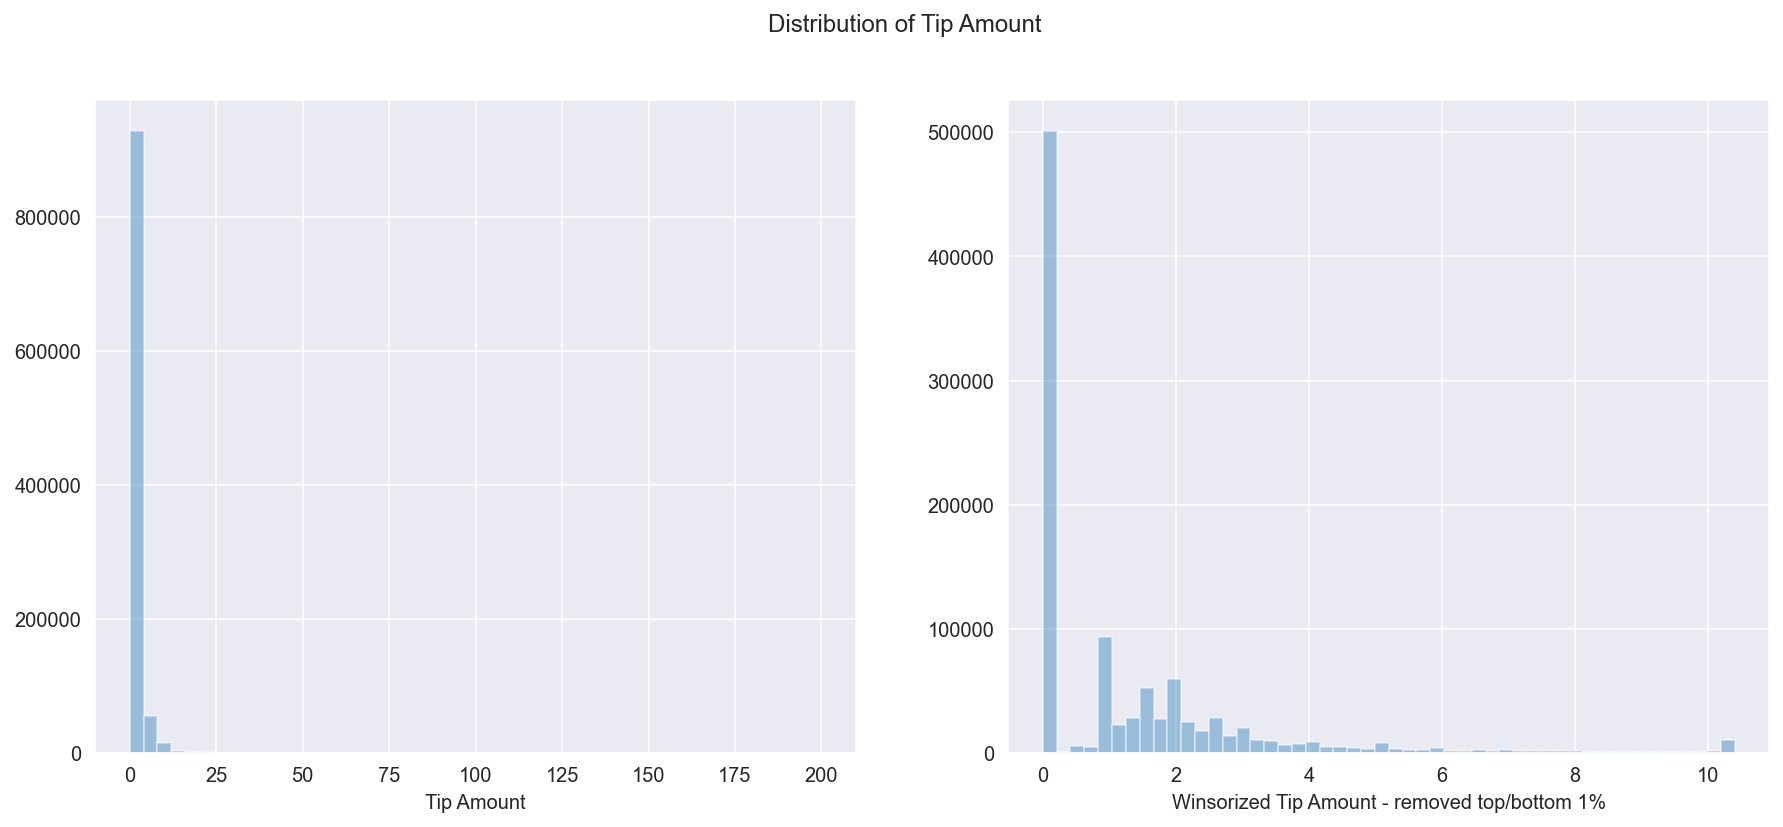

In [28]:
(fig, ax) = plt.subplots(1,2, figsize=(15,6))
ax[0] = sns.distplot(df['tip_amount'], ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(df['tip_amount'], limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Tip Amount')
None

In [29]:
winsorized_tip_amt = winsorize(df['tip_amount'], limits=[0.01, 0.01])
tip_amt_median = np.median(winsorized_tip_amt)

tip_amt_lower = stats.scoreatpercentile(winsorized_tip_amt, 5)
tip_amt_upper = stats.scoreatpercentile(winsorized_tip_amt, 95)

print(tip_amt_lower, tip_amt_median, tip_amt_upper)

0.0 0.01 4.9


/opt/miniconda3/envs/pycaret/lib/python3.6/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


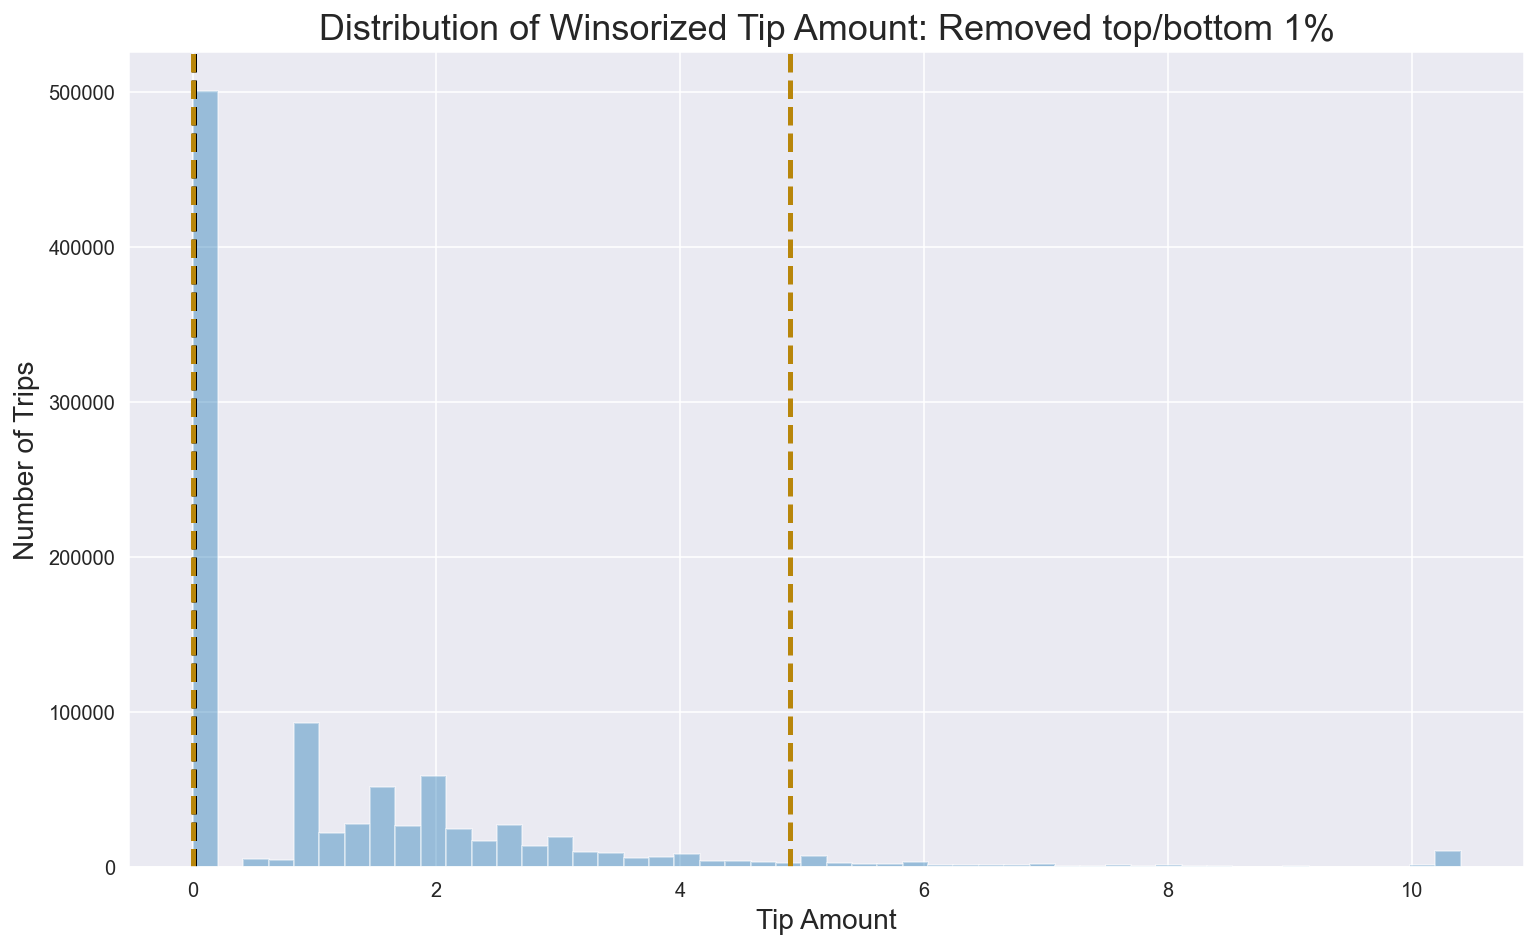

In [30]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_tip_amt, kde=False)
ax.axvline(tip_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Tip Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Tip Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None


### Airport Tips

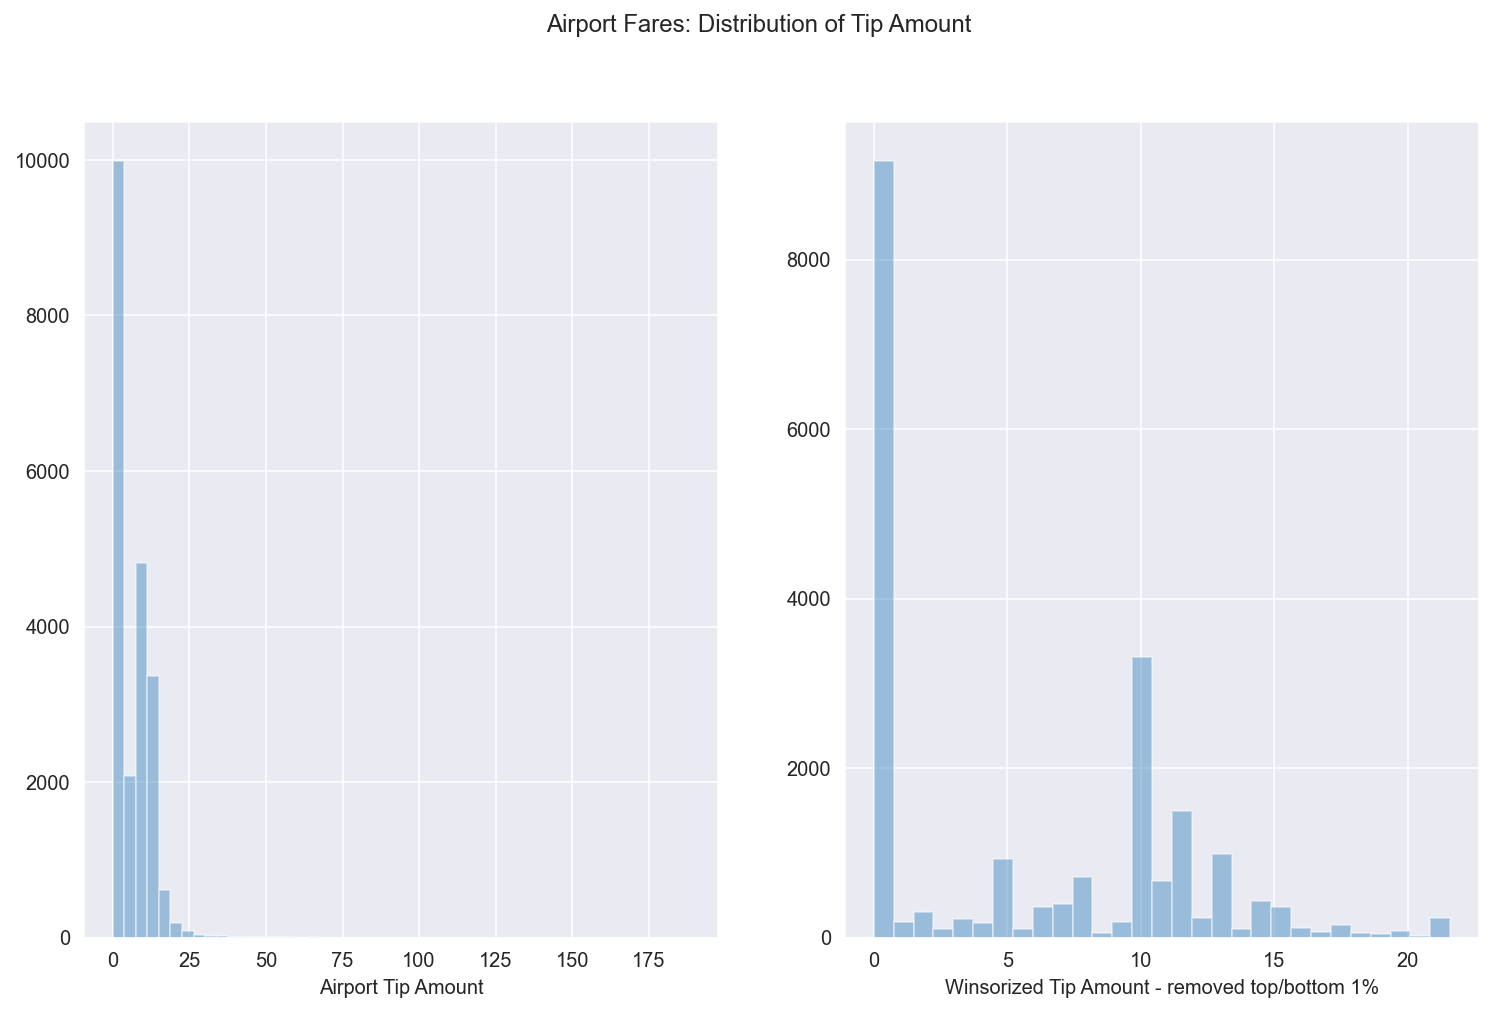

In [31]:
(fig, ax) = plt.subplots(1,2, figsize=(12.5,7.5))
ax[0] = sns.distplot(airport_fare['tip_amount'], ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(airport_fare['tip_amount'], limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Airport Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Airport Fares: Distribution of Tip Amount')
None

In [32]:
airport_winsorized_tip_amt = winsorize(airport_fare['tip_amount'], limits=[0.01, 0.01])
airport_tip_amt_median = np.median(airport_winsorized_tip_amt)

airport_tip_amt_lower = stats.scoreatpercentile(airport_winsorized_tip_amt, 5)
airport_tip_amt_upper = stats.scoreatpercentile(airport_winsorized_tip_amt, 95)

print(airport_tip_amt_lower, airport_tip_amt_median, airport_tip_amt_upper)


0.0 5.0 15.0


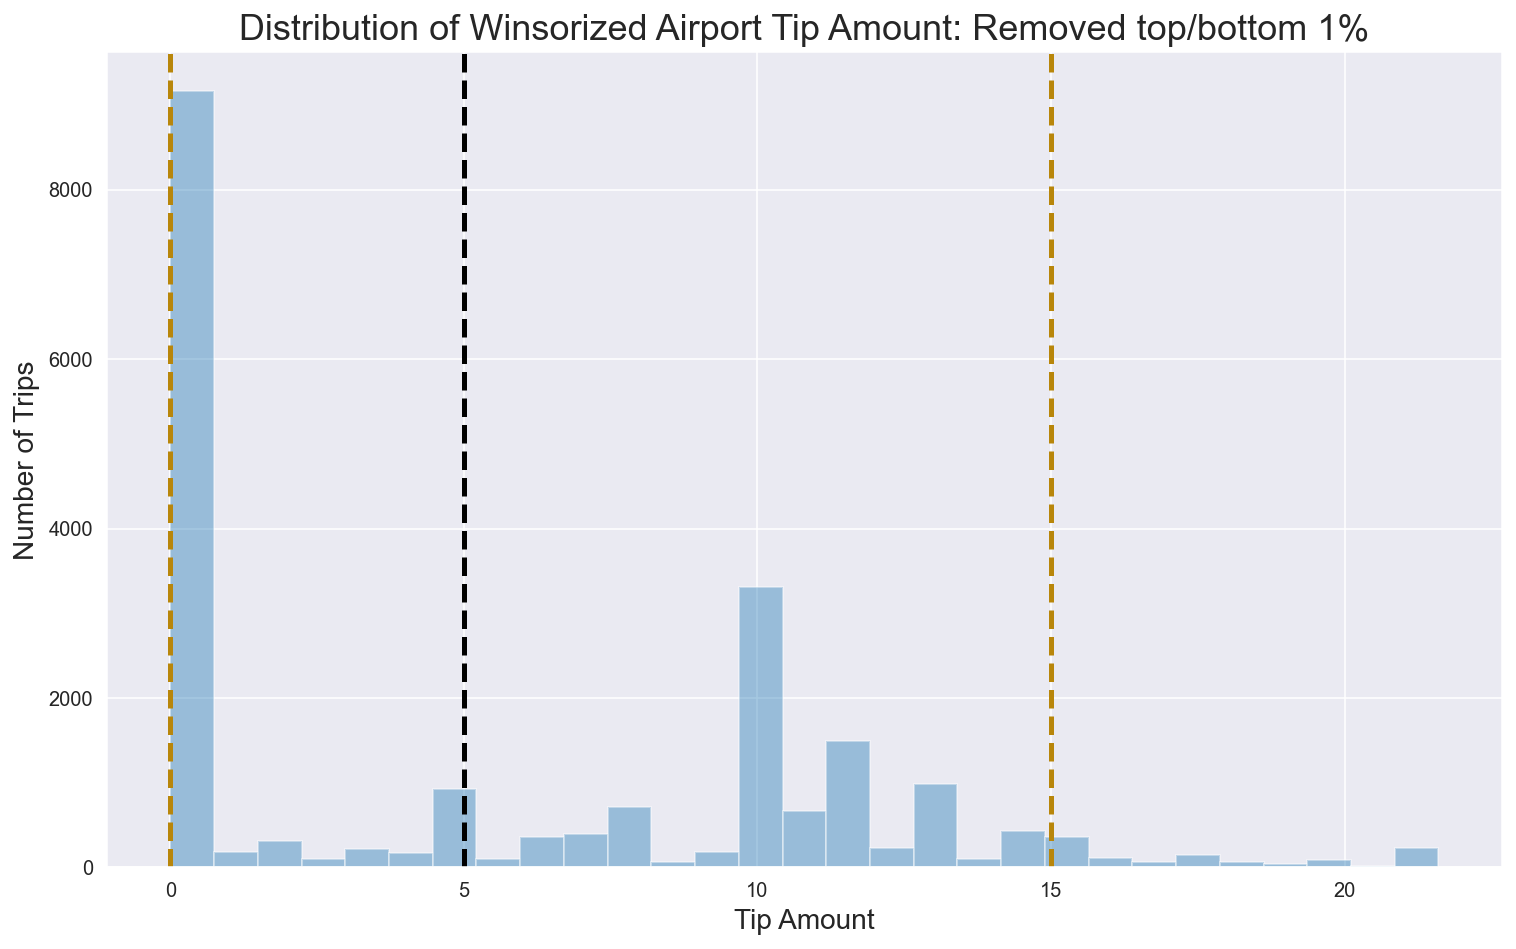

In [33]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(airport_winsorized_tip_amt, kde=False)
ax.axvline(airport_tip_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(airport_tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(airport_tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Airport Tip Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Tip Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

### NonAirport Tips

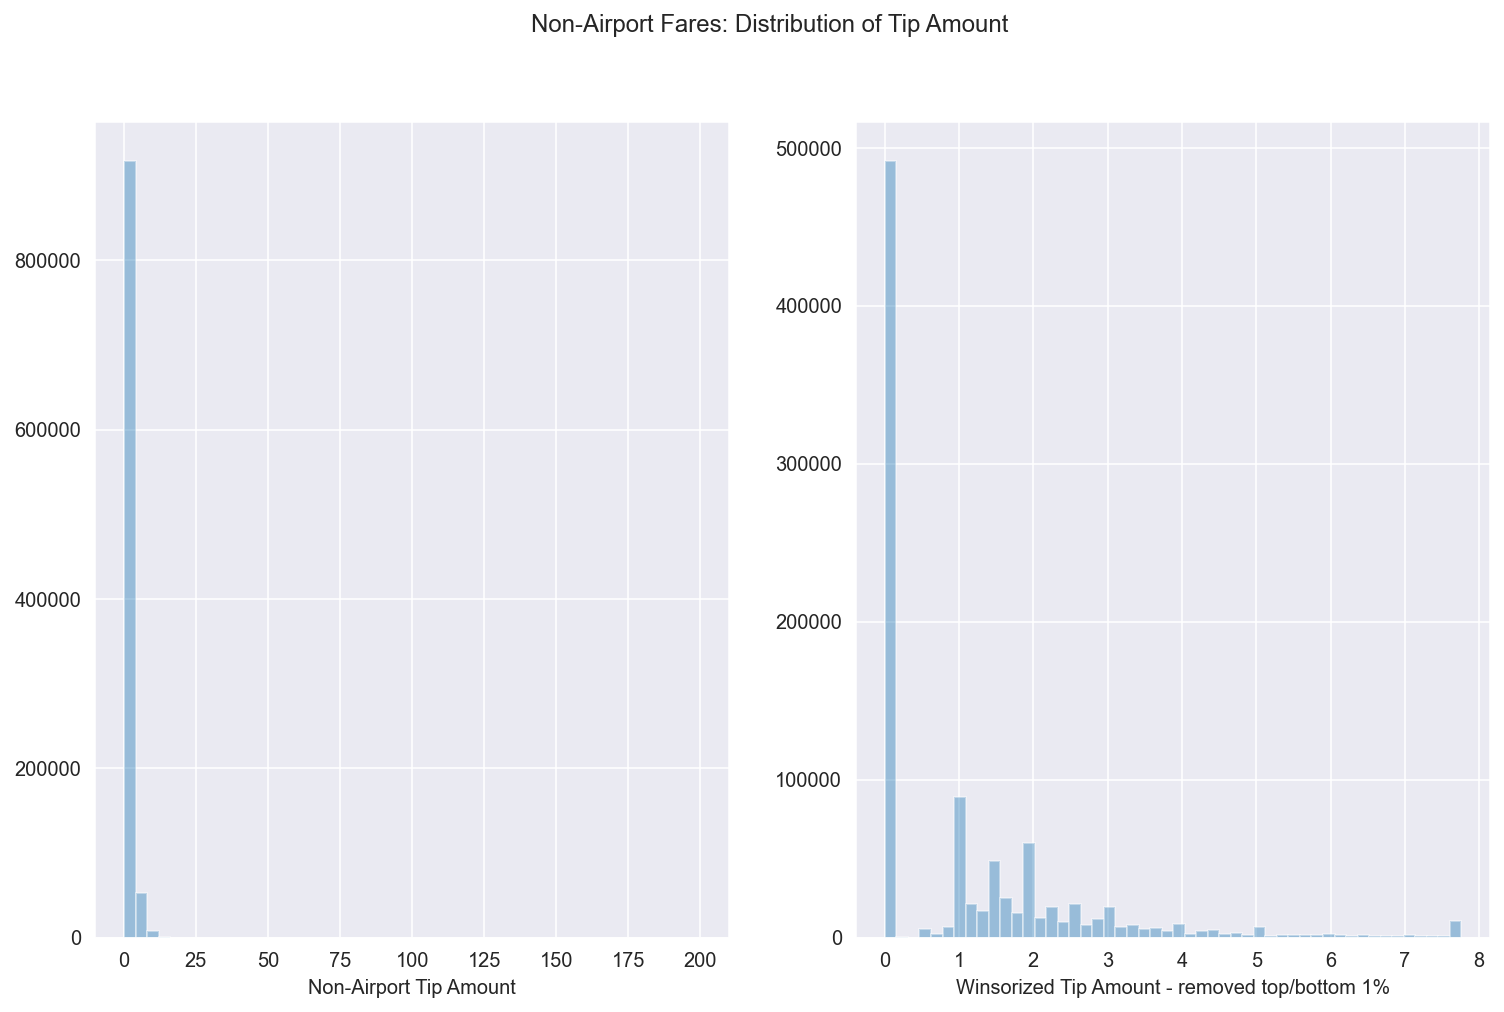

In [34]:
(fig, ax) = plt.subplots(1,2, figsize=(12.5,7.5))
ax[0] = sns.distplot(nonairport_fare['tip_amount'], ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(nonairport_fare['tip_amount'], limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Non-Airport Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Non-Airport Fares: Distribution of Tip Amount')
None

In [35]:
nonairport_winsorized_tip_amt = winsorize(nonairport_fare['tip_amount'], limits=[0.01, 0.01])
nonairport_tip_amt_median = np.median(nonairport_winsorized_tip_amt)

nonairport_tip_amt_lower = stats.scoreatpercentile(nonairport_winsorized_tip_amt, 5)
nonairport_tip_amt_upper = stats.scoreatpercentile(nonairport_winsorized_tip_amt, 95)

print(nonairport_tip_amt_lower, nonairport_tip_amt_median, nonairport_tip_amt_upper)

0.0 0.0 4.35


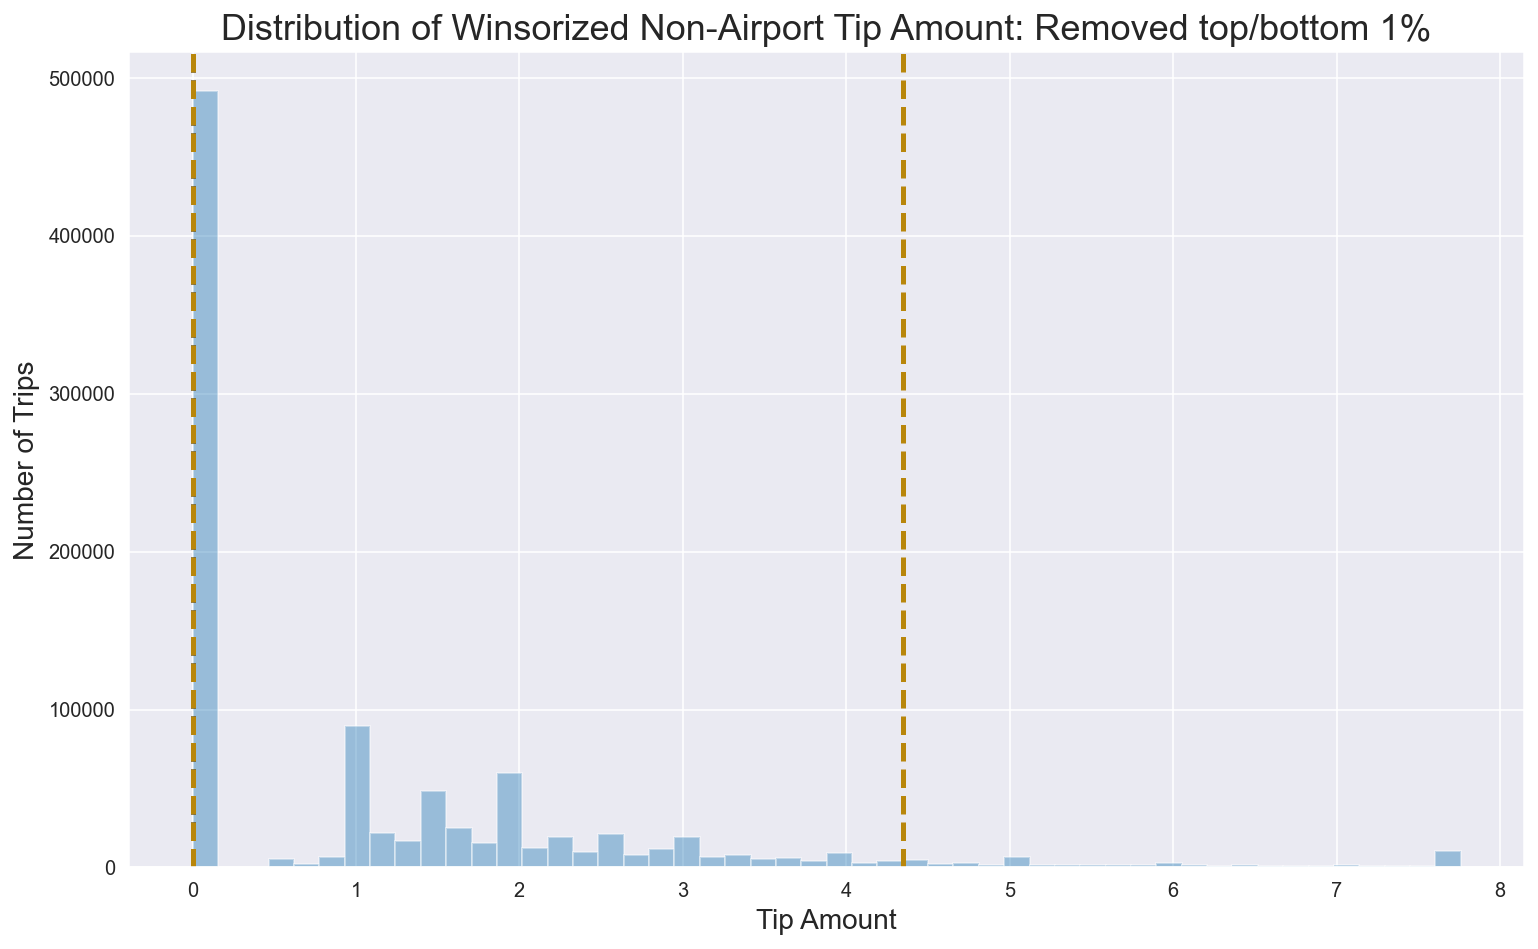

In [36]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(nonairport_winsorized_tip_amt, kde=False)
ax.axvline(nonairport_tip_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(nonairport_tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(nonairport_tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Non-Airport Tip Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Tip Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

### What is the distribution of total amount?

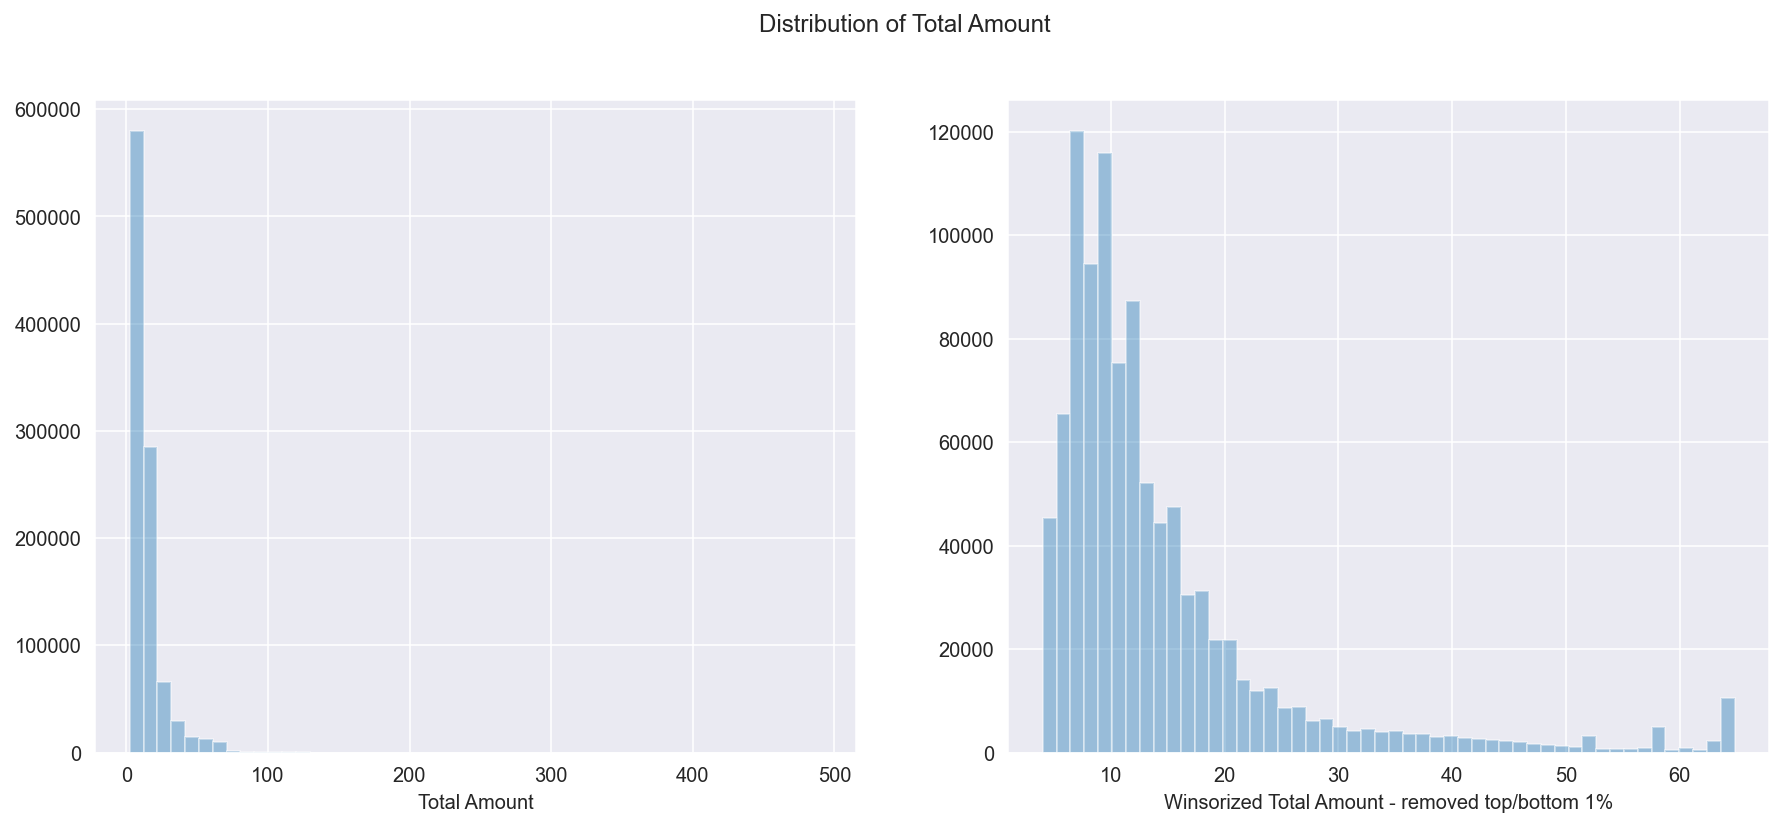

In [37]:
(fig, ax) = plt.subplots(1,2, figsize=(15,6))
ax[0] = sns.distplot(df['total_amount'], kde=False, ax=ax[0])
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(df['total_amount'], limits=[0.01, 0.01]), kde=False, ax=ax[1])
ax[0].set_xlabel('Total Amount')
ax[1].set_xlabel('Winsorized Total Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Total Amount')
None

In [38]:
winsorized_tot_amt = winsorize(df['total_amount'], limits=[0.01, 0.01])
tot_amt_median = np.median(winsorized_tot_amt)

tot_amt_lower = stats.scoreatpercentile(winsorized_tot_amt, 5)
tot_amt_upper = stats.scoreatpercentile(winsorized_tot_amt, 95)

print(tot_amt_lower, tot_amt_median, tot_amt_upper)

5.5 11.0 38.0


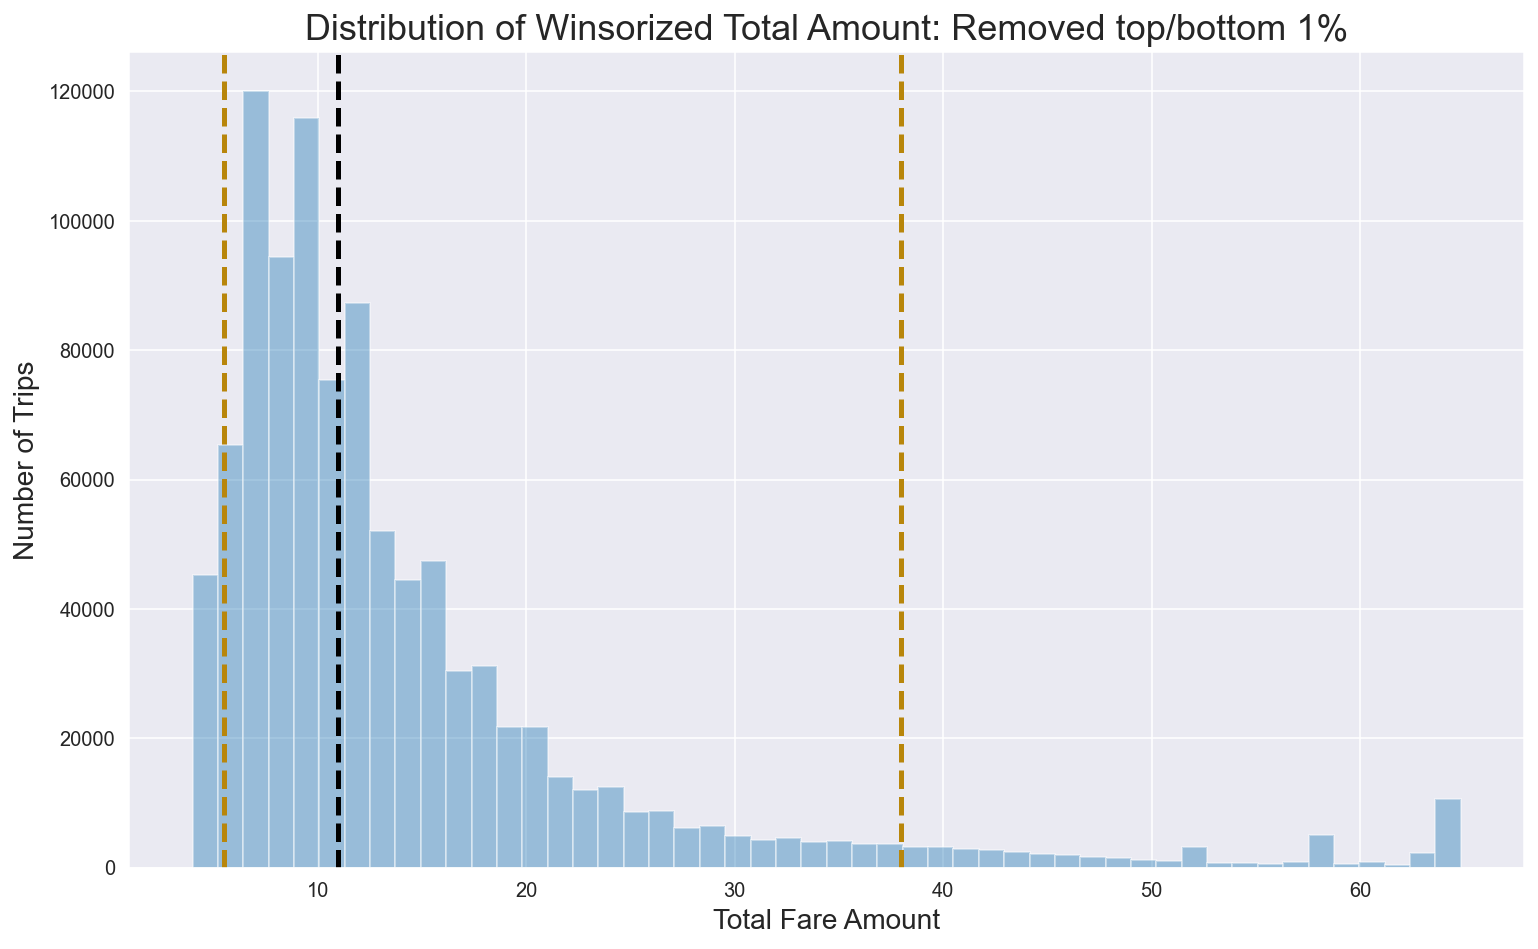

In [39]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_tot_amt, kde=False)
ax.axvline(tot_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Total Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Total Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

## What are top 5 busiest hours of the day?

In [40]:
# Convert pickup_datetime and dropoff_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.50,-73.96,40.77,-73.98,40.79,CRD,11.00,1.00,0.50,2.50,0.00,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.60,0.00,0.00,0.00,0.00,CRD,8.50,0.00,0.50,1.80,0.00,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.60,-73.98,40.75,-74.01,40.72,CRD,16.50,1.00,0.50,3.60,0.00,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.90,-73.98,40.76,-73.96,40.78,CRD,10.00,1.00,0.50,3.45,0.00,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.60,-74.01,40.74,-73.96,40.76,CRD,15.00,0.50,0.50,3.20,0.00,19.20


In [41]:
# Use pickup datetime to determine hour e.g. if someone was picked up at 23:15:16, they were picked up at 2300 hours
df.groupby(df['pickup_datetime'].dt.hour)['passenger_count'].sum().sort_values(ascending=False)

pickup_datetime
23    118828
22    115897
19    102486
21     99994
18     99831
20     98892
0      96467
12     85759
13     85490
14     83403
17     83229
15     80728
11     79707
1      79598
10     70925
16     69254
2      65749
9      60227
3      50442
8      47364
7      35976
4      32405
6      21934
5      16720
Name: passenger_count, dtype: int64

In [42]:
b = df.groupby(df['pickup_datetime'].dt.hour)['passenger_count'].size().sort_values(ascending=False).head()
b = b.to_frame().reset_index()
b = b.rename(columns={'pickup_datetime': 'hour'})
b_df = b.copy()
b_df

,hour,passenger_count
0,22,63216
1,23,63181
2,19,58066
3,18,56485
4,20,56440


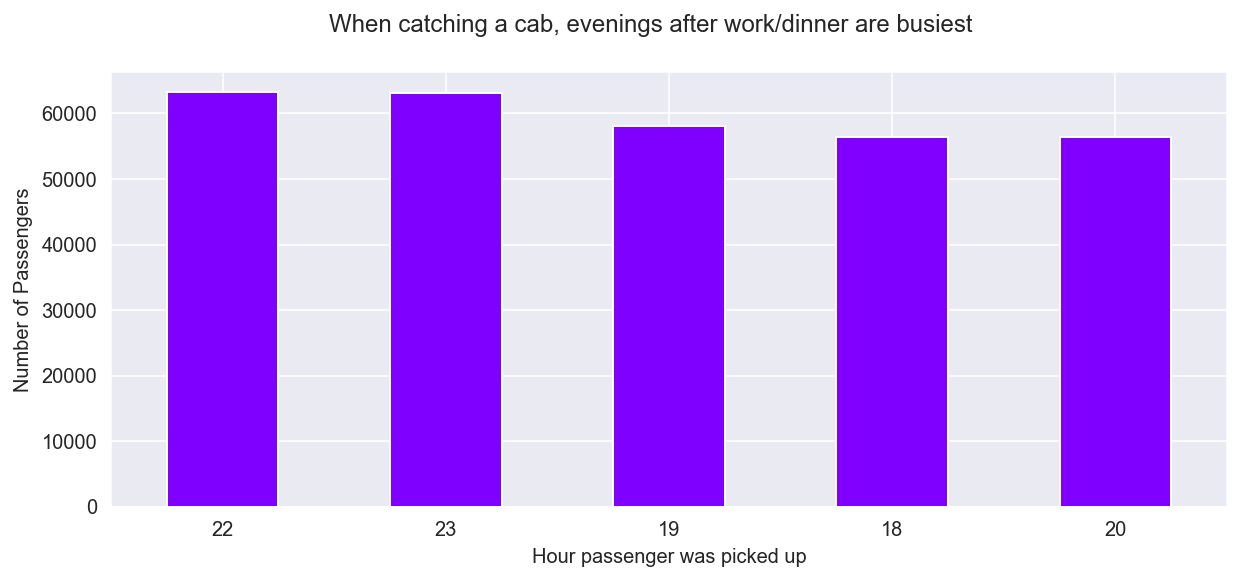

In [43]:
fig, ax = plt.subplots(figsize=(10,4))
ax = b_df.set_index('hour').plot(kind='bar', colormap='rainbow', legend=False, rot=0, ax=ax)
ax.set_xlabel('Hour passenger was picked up')
ax.set_ylabel('Number of Passengers')
fig.suptitle('When catching a cab, evenings after work/dinner are busiest')
plt.ticklabel_format(style='plain', axis='y')
None

Note that the busiest hous of the day are between 6pm and 11pm as seen in the bar chart above

## What are the top 10 busiest locations of the city?

In [44]:
# 2 d.p. of precision will suffice
taxi_df3 = df.copy()
taxi_df3['pickup_latitude'] = taxi_df3['pickup_latitude'].round(2)
taxi_df3['pickup_longitude'] = taxi_df3.pickup_longitude.round(2)
taxi_df3['dropoff_latitude'] = taxi_df3.dropoff_latitude.round(2)
taxi_df3['dropoff_longitude'] = taxi_df3.dropoff_longitude.round(2)
taxi_df3.tail()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
1000013,6F9CA6CC12D2F98CFC9566D31CF0558D,C544C0BC3F26B9E109F639124ECD2B40,CMT,1,N,2013-04-20 04:40:27,2013-04-20 04:46:50,1,383,1.60,-73.96,40.72,-73.94,40.71,CRD,7.00,0.50,0.50,1.60,0.00,9.60
1000014,A408F138216DE3E432BBF2FD88665A88,82EA6A085709BE93AA9DA363A85A04FF,CMT,1,N,2013-04-23 01:53:07,2013-04-23 01:56:40,1,212,1.10,-73.99,40.73,-73.98,40.74,CRD,5.50,0.50,0.50,1.00,0.00,7.50
1000015,253C9C1C3A11CD9B78894BC37D2A0991,2372B543B0435613250186F68B6C56B8,CMT,1,N,2013-04-18 13:41:44,2013-04-18 13:53:02,1,677,1.30,-73.99,40.75,-73.98,40.77,CRD,9.00,0.00,0.50,1.00,0.00,10.50
1000016,52A17C272796C501FD4F2D823CEA5E4C,50F164ACD525DA58E88585BB48130534,CMT,1,N,2013-04-18 13:40:47,2013-04-18 13:53:22,1,755,1.20,0.00,0.00,0.00,0.00,CRD,9.00,0.00,0.50,1.00,0.00,10.50
1000017,0B5D05352D0036C5FCC7AB657048314D,697F61E32099CA3766610B4E982C4782,CMT,1,N,2013-04-17 18:03:38,2013-04-17 18:25:59,1,1341,3.20,-73.95,40.79,-73.98,40.75,CRD,16.50,1.00,0.50,3.60,0.00,21.60


In [45]:
taxi_df3['pickup_geocode'] = taxi_df3.pickup_latitude.astype(str) + ', ' + taxi_df3.pickup_longitude.astype(str)
taxi_df3['dropoff_geocode'] = taxi_df3.dropoff_latitude.astype(str) + ', ' + taxi_df3.dropoff_longitude.astype(str)
taxi_df3.tail()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_geocode,dropoff_geocode
1000013,6F9CA6CC12D2F98CFC9566D31CF0558D,C544C0BC3F26B9E109F639124ECD2B40,CMT,1,N,2013-04-20 04:40:27,2013-04-20 04:46:50,1,383,1.60,-73.96,40.72,-73.94,40.71,CRD,7.00,0.50,0.50,1.60,0.00,9.60,"40.72, -73.96","40.71, -73.94"
1000014,A408F138216DE3E432BBF2FD88665A88,82EA6A085709BE93AA9DA363A85A04FF,CMT,1,N,2013-04-23 01:53:07,2013-04-23 01:56:40,1,212,1.10,-73.99,40.73,-73.98,40.74,CRD,5.50,0.50,0.50,1.00,0.00,7.50,"40.73, -73.99","40.74, -73.98"
1000015,253C9C1C3A11CD9B78894BC37D2A0991,2372B543B0435613250186F68B6C56B8,CMT,1,N,2013-04-18 13:41:44,2013-04-18 13:53:02,1,677,1.30,-73.99,40.75,-73.98,40.77,CRD,9.00,0.00,0.50,1.00,0.00,10.50,"40.75, -73.99","40.77, -73.98"
1000016,52A17C272796C501FD4F2D823CEA5E4C,50F164ACD525DA58E88585BB48130534,CMT,1,N,2013-04-18 13:40:47,2013-04-18 13:53:22,1,755,1.20,0.00,0.00,0.00,0.00,CRD,9.00,0.00,0.50,1.00,0.00,10.50,"0.0, 0.0","0.0, 0.0"
1000017,0B5D05352D0036C5FCC7AB657048314D,697F61E32099CA3766610B4E982C4782,CMT,1,N,2013-04-17 18:03:38,2013-04-17 18:25:59,1,1341,3.20,-73.95,40.79,-73.98,40.75,CRD,16.50,1.00,0.50,3.60,0.00,21.60,"40.79, -73.95","40.75, -73.98"


### Most popular pickup Locations

In [46]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-app") 

pickup = taxi_df3.groupby('pickup_geocode')['pickup_geocode'].count().sort_values(ascending=False).head(10)
pickup = pickup.to_frame().rename(columns={'pickup_geocode':'Number of Trips'}).reset_index()
pickup_df = pickup.copy()
pickup_df = pickup_df.rename(columns={'pickup_geocode':'Pickup_Geocode'})
pickup_df['location'] = pickup_df.Pickup_Geocode.apply(geolocator.reverse)
pickup_df['address'] = [i.address for i in pickup_df.location]
pickup_df['address'] = pickup_df['address'].astype(str)
pickup_df['zipcode'] = pickup_df['address'].str.extract('(\d{5})', expand=True).astype(int)
pickup_df.drop('location',axis=1,inplace=True)
pickup_df

,Pickup_Geocode,Number of Trips,address,zipcode
0,"40.76, -73.97",53549,"664, Lexington Avenue, Manhattan Community Boa...",10022
1,"40.75, -73.99",52852,"137, West 33rd Street, Manhattan Community Boa...",10001
2,"40.76, -73.98",46500,"1270 Avenue of the Americas, 1270, 6th Avenue,...",10020
3,"40.75, -73.98",45621,"35, East 38th Street, Murray Hill, Manhattan C...",10016
4,"40.76, -73.99",45109,"341, West 45th Street, Theater District, Hell'...",10036
5,"40.74, -73.99",44018,"10, East 21st Street, Manhattan Community Boar...",10010
6,"40.73, -73.99",39859,"51 Astor Place, East 9th Street, East Village,...",10003
7,"40.73, -74.0",35168,"New York University, West Houston Street, Manh...",10012
8,"40.74, -74.0",33195,"218, West 16th Street, Chelsea District, Manha...",10011
9,"40.74, -73.98",31009,"242, East 26th Street, Kips Bay, Manhattan Com...",10010


In [47]:
pickup_df['Number of Trips'].sum()

426880

### Most popular dropoff Locations

In [49]:
dropoff = taxi_df3.groupby('dropoff_geocode')['dropoff_geocode'].count().sort_values(ascending=False).head(10)
dropoff = dropoff.to_frame().rename(columns={'dropoff_geocode':'Number of Trips'}).reset_index()
dropoff_df = dropoff.copy()
dropoff_df = dropoff_df.rename(columns={'dropoff_geocode':'Dropoff_Geocode'})
dropoff_df['location'] = dropoff_df.Dropoff_Geocode.apply(geolocator.reverse)
dropoff_df['address'] = [i.address for i in dropoff_df.location]
dropoff_df['address'] = dropoff_df['address'].astype(str)
dropoff_df['zipcode'] = dropoff_df['address'].str.extract('(\d{5})', expand=True).astype(int)
dropoff_df.drop('location',axis=1,inplace=True)
dropoff_df

,Dropoff_Geocode,Number of Trips,address,zipcode
0,"40.75, -73.99",49932,"137, West 33rd Street, Manhattan Community Boa...",10001
1,"40.76, -73.98",46907,"1270 Avenue of the Americas, 1270, 6th Avenue,...",10020
2,"40.76, -73.97",46198,"664, Lexington Avenue, Manhattan Community Boa...",10022
3,"40.75, -73.98",43141,"35, East 38th Street, Murray Hill, Manhattan C...",10016
4,"40.76, -73.99",38842,"341, West 45th Street, Theater District, Hell'...",10036
5,"40.74, -73.99",37294,"10, East 21st Street, Manhattan Community Boar...",10010
6,"40.73, -73.99",32378,"51 Astor Place, East 9th Street, East Village,...",10003
7,"40.73, -74.0",30537,"New York University, West Houston Street, Manh...",10012
8,"40.77, -73.96",29962,"Dallas BBQ, 1265, 3rd Avenue, Carnegie Hill, M...",10021
9,"40.74, -73.98",28313,"242, East 26th Street, Kips Bay, Manhattan Com...",10010


In [50]:
dropoff_df['Number of Trips'].sum()

383504

Note the pickup and dropoff address geocodes are identical. The most popular locations are in Manhattan.



In [51]:
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

In [52]:
taxi_df3.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_geocode,dropoff_geocode
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.50,-73.96,40.77,-73.98,40.79,CRD,11.00,1.00,0.50,2.50,0.00,15.00,"40.77, -73.96","40.79, -73.98"
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.60,0.00,0.00,0.00,0.00,CRD,8.50,0.00,0.50,1.80,0.00,10.80,"0.0, 0.0","0.0, 0.0"
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.60,-73.98,40.75,-74.01,40.72,CRD,16.50,1.00,0.50,3.60,0.00,21.60,"40.75, -73.98","40.72, -74.01"
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.90,-73.98,40.76,-73.96,40.78,CRD,10.00,1.00,0.50,3.45,0.00,14.95,"40.76, -73.98","40.78, -73.96"
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.60,-74.01,40.74,-73.96,40.76,CRD,15.00,0.50,0.50,3.20,0.00,19.20,"40.74, -74.01","40.76, -73.96"


## If you were a taxi owner, how would you minimize your work time while retaining the average wages earned by a typical taxi in the dataset?

In [48]:
cabs = taxi_df3.groupby(df['pickup_datetime'].dt.hour)['pickup_geocode'].count().sort_values(ascending=False).head(10)
cabs = cabs.to_frame().rename(columns={'pickup_geocode':'Number of Trips'}).reset_index()
cabs_df = cabs.copy()
cabs_df['location'] = pickup_df.Pickup_Geocode.apply(geolocator.reverse)
cabs_df['address'] = [i.address for i in cabs_df.location]
cabs_df['address'] = cabs_df['address'].astype(str)
cabs_df['zipcode'] = cabs_df['address'].str.extract('(\d{5})', expand=True).astype(int)
cabs_df.drop('location',axis=1,inplace=True)
cabs_df


,pickup_datetime,Number of Trips,address,zipcode
0,22,63216,"664, Lexington Avenue, Manhattan Community Boa...",10022
1,23,63181,"137, West 33rd Street, Manhattan Community Boa...",10001
2,19,58066,"1270 Avenue of the Americas, 1270, 6th Avenue,...",10020
3,18,56485,"35, East 38th Street, Murray Hill, Manhattan C...",10016
4,20,56440,"341, West 45th Street, Theater District, Hell'...",10036
5,21,56049,"10, East 21st Street, Manhattan Community Boar...",10010
6,0,51291,"51 Astor Place, East 9th Street, East Village,...",10003
7,12,48184,"New York University, West Houston Street, Manh...",10012
8,13,47276,"218, West 16th Street, Chelsea District, Manha...",10011
9,17,46589,"242, East 26th Street, Kips Bay, Manhattan Com...",10010


From the table above, we can see that these locations are top busy spots at the times shown. If a driver puts timing into consideration, the driver could minimise work time and still maintain an average wage. This would be quite useful for drivers doing more than one jobs.

Futher more, a taxi owner looking to minimize their driver’s work time should ensure drivers are working most especially during evening shifts from 6pm onwards. By contrast demand for taxis is much lower during the day.

By far the evening route that generates the most revenue per hour begins and ends from geocode (40.77, -74.0) and is an airport to airport transfer route. These are followed by several routes within Manhattan.

In [53]:
gdf = geopandas.GeoDataFrame(
    taxi_df3, geometry=geopandas.points_from_xy(taxi_df3.pickup_longitude, taxi_df3.pickup_latitude))

In [54]:
print(gdf.head())


                          medallion                      hack_license  \
0  91F6EB84975BBC867E32CB113C7C2CD5  AD8751110E6292079EB10EB9481FE1A6   
1  EC34CD1B3797DFAFF3FE099BA87B6656  8FE6A4AEDF89B6B4E19D2377FD3FB7D7   
2  C1B9DA774DC2BBC6DE27CE994E7F44A0  E1B595FD55E4C82C1E213EB17438107A   
3  9BA84250355AB3FC031C9252D395BF8A  16BB0D96A0DCC853AEC7F55C8D6C71E0   
4  205A696DF62AD03C88DA8C5EC5248639  579C41EA5EC846F8B641A42F9EE3E855   

  vendor_id  rate_code store_and_fwd_flag     pickup_datetime  \
0       CMT          1                  N 2013-04-04 18:47:45   
1       CMT          1                  N 2013-04-05 07:08:34   
2       CMT          1                  N 2013-04-04 17:59:50   
3       CMT          1                  N 2013-04-04 18:12:01   
4       CMT          1                  N 2013-04-04 20:12:57   

     dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0 2013-04-04 19:00:25                1                759           2.50   
1 2013-04-05 07:17

## Visualising top spots

#### Preprocessing longitude and latitude for top pickup locations

In [61]:
pickup_df['longitude'] = pickup_df['Pickup_Geocode'].str.rsplit(',').str[-1]

pickup_df['latitude'] = pickup_df['Pickup_Geocode'].str.split(',').str[0]


pickup_df

,Pickup_Geocode,Number of Trips,address,zipcode,longitude,latitude
0,"40.76, -73.97",53549,"664, Lexington Avenue, Manhattan Community Boa...",10022,-73.97,40.76
1,"40.75, -73.99",52852,"137, West 33rd Street, Manhattan Community Boa...",10001,-73.99,40.75
2,"40.76, -73.98",46500,"1270 Avenue of the Americas, 1270, 6th Avenue,...",10020,-73.98,40.76
3,"40.75, -73.98",45621,"35, East 38th Street, Murray Hill, Manhattan C...",10016,-73.98,40.75
4,"40.76, -73.99",45109,"341, West 45th Street, Theater District, Hell'...",10036,-73.99,40.76
5,"40.74, -73.99",44018,"10, East 21st Street, Manhattan Community Boar...",10010,-73.99,40.74
6,"40.73, -73.99",39859,"51 Astor Place, East 9th Street, East Village,...",10003,-73.99,40.73
7,"40.73, -74.0",35168,"New York University, West Houston Street, Manh...",10012,-74.0,40.73
8,"40.74, -74.0",33195,"218, West 16th Street, Chelsea District, Manha...",10011,-74.0,40.74
9,"40.74, -73.98",31009,"242, East 26th Street, Kips Bay, Manhattan Com...",10010,-73.98,40.74


In [70]:
pickup_df['longitude'].astype(float)
pickup_df['latitude'].astype(float)
pickup_df['longitude'] = pd.to_numeric(pickup_df['longitude'], errors='coerce')
pickup_df['latitude'] = pd.to_numeric(pickup_df['latitude'], errors='coerce')


In [71]:
pickup_df['latitude'].dtypes

dtype('float64')

In [ ]:
## Using folium map to visualise top locations for pickups

In [74]:
map = folium.Map(location=[pickup_df.latitude.mean(), 
                           pickup_df.longitude.mean()], zoom_start=3, control_scale=True)
for index, location_info in pickup_df.iterrows():
    folium.Marker([location_info["latitude"], 
                   location_info["longitude"]], popup=location_info["address"]).add_to(map)
    


In [75]:
map

The marked locations in the map above are the top pickup locations. This can potentially be a top spot for drivers looking to minimise work time while retaining average wages or a taxi company owner who wants to maximise earnings. 

## How would a taxi owner maximize earnings in a day?

You can maximise earnings in a day by looking at routes that generate the highest daily revenue and the routes that earn the highest revenue per hour. This way a taxi owner can either concentrate on areas that generate the highest revenue or lease out a medallion taxi to two drivers driving 12 hour shifts to maximize daily revenue.


## Which trip has the highest standard deviation of travel time?

A trip is defined as combination of a pickup geocode and a dropoff geocode. What minimum sample size do we need to calculate this standard deviation?

* Margin of Error = 5%
* Confidence Interval = 95% which is a Z-Score of 1.96
* Standard Deviation = 0.5 (expecting 50% standard deviation will ensure large enough sample size)

Necessary Sample Size = ((1.96 x 0.5)/0.05)^2 = 384.16 = 385 trips

In [87]:
taxi_df4 = taxi_df3.copy()
# Creating trips with a combination of pickup and dropoff codes
taxi_df4['route'] = taxi_df4.pickup_geocode + ' : ' + taxi_df4.dropoff_geocode
# Filter down to routes with 385+ trips
taxi_df4 = taxi_df4.groupby('route').filter(lambda x: len(x) >= 385)
# Check
taxi_df4.groupby('route').size().sort_values(ascending=True).head()

route
40.76, -73.99 : 40.73, -74.01    385
40.79, -73.97 : 40.76, -73.99    385
40.77, -73.98 : 40.78, -73.99    386
40.77, -73.96 : 40.74, -74.0     387
40.77, -73.95 : 40.78, -73.98    389
dtype: int64

In [88]:
## Which trip has the highest standard deviation of travel times?|
taxi_df4.groupby('route')['trip_time_in_secs'].std().sort_values(ascending=False).head(10)

route
40.77, -73.87 : 40.76, -73.99   621.95
40.77, -73.87 : 40.75, -73.99   595.08
40.77, -73.87 : 40.76, -73.98   564.81
0.0, 0.0 : 0.0, 0.0             561.47
40.77, -73.86 : 40.76, -73.98   549.19
40.77, -73.87 : 40.75, -73.98   544.02
40.77, -74.02 : 40.77, -74.02   491.27
40.77, -73.87 : 40.76, -73.97   481.56
40.72, -74.0 : 40.72, -74.0     444.84
40.76, -73.99 : 40.77, -73.87   419.01
Name: trip_time_in_secs, dtype: float64

In [78]:
# Trip 1 - within the airport (terminal to terminal?)
start_loc = geolocator.reverse("40.77, -73.87")
print(start_loc.address)

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens, Queens County, New York, 11369, United States


In [80]:
end_loc = geolocator.reverse("40.76, -73.99")
print(start_loc.address)

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens, Queens County, New York, 11369, United States


In [90]:
# Trip 2 - within the airport (terminal to terminal?)
start_loc = geolocator.reverse("40.77, -73.87")
print(start_loc.address)

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens, Queens County, New York, 11369, United States


In [91]:
end_loc = geolocator.reverse("40.75, -73.99")
print(start_loc.address)

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens, Queens County, New York, 11369, United States


In [92]:
# Trip 3 - Airport Route
start_loc = geolocator.reverse("40.77, -73.87")
print(start_loc.address)

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens, Queens County, New York, 11369, United States


In [93]:
end_loc = geolocator.reverse("40.76, -73.98")
print(start_loc.address)

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens, Queens County, New York, 11369, United States


In [94]:
# Trip 9 - standard city route
start_loc = geolocator.reverse("40.72, -74.0")
print(start_loc.address)

13, Crosby Street, Manhattan Community Board 2, Manhattan, New York County, New York, 10013, United States


In [95]:
end_loc = geolocator.reverse("40.77, -73.87")
print(start_loc.address)

13, Crosby Street, Manhattan Community Board 2, Manhattan, New York County, New York, 10013, United States


Most of the trips with the highest standard deviations are airpot trips and this makes sense as just very few proportion of trips in the dataset represent airport trip while majority are just standard city trips

## If you run a taxi company with 10 taxis, how would you maximize your earnings?


I would ensure taxis are available at the most popular pickup and dropoff locations and for trips with the most consistent fares. However you wouldn’t want taxis working for the same company to undercut each other for the same fare.

My analysis so far reveals several insights for a smaller taxi company:

- Instruct taxi drivers to focus on the routes with the highest earnings per hour (or earnings per mile). This would keep taxis working within smaller areas (zipcodes) and would allow the company to keep a fleet of cars working airport shifts and another fleet working Manhattan island shifts. The difficulty here is whether taxis could legally deny providing service to passengers who want to travel out of these zones

- Once a taxi driver has earned half the average daily wage of taxi driver during their shift, give them the option to engage out of town fares or those fares whose trip times have higher standard deviation e.g. Manhattan to LaGuardia fares or possibly out of town fares where the total amount earned may be higher.

- The worst time to have a taxi out for service are week nights or Friday and Saturday nights as these tend to be the busiest times. Get taxis serviced during the day.

- The most popular routes may be overcrowded, so it may be worth focusing on trips that generate the highest total revenue with the smallest number of individual trips.

## Which trip has the most consistent fares?


Looking for those routes where standard deviation of fare amounts is among the lowest.

In [96]:
taxi_df4.groupby('route')['fare_amount'].std().sort_values(ascending=True).head(10)

route
40.78, -73.95 : 40.79, -73.94   1.03
40.8, -73.97 : 40.79, -73.98    1.12
40.79, -73.98 : 40.8, -73.97    1.16
40.78, -73.98 : 40.79, -73.98   1.17
40.79, -73.97 : 40.81, -73.96   1.19
40.79, -73.97 : 40.8, -73.96    1.19
40.79, -73.98 : 40.78, -73.98   1.20
40.77, -73.96 : 40.78, -73.95   1.23
40.77, -73.98 : 40.78, -73.99   1.25
40.77, -73.99 : 40.78, -73.98   1.25
Name: fare_amount, dtype: float64

In [97]:
# Trip 1
start_loc = geolocator.reverse("40.78, -73.95")
print(start_loc.address)

1720, 2nd Avenue, East Harlem, Yorkville, Manhattan, New York County, New York, 10128, United States


In [99]:
end_loc = geolocator.reverse("40.79, -73.94")
print(end_loc.address)

2065, 1st Avenue, East Harlem, Manhattan Community Board 11, Manhattan, New York County, New York, 10029, United States


In [100]:
# Trip 2
start_loc = geolocator.reverse("40.8, -73.97")
print(start_loc.address)

885, West End Avenue, Upper West Side, Manhattan Community Board 7, Manhattan, New York County, New York, 10025, United States


In [101]:
end_loc = geolocator.reverse("40.79, -73.98")
print(end_loc.address)

The Normandy, 140, Riverside Drive, Upper West Side, Manhattan Community Board 7, Manhattan, New York County, New York, 10024, United States


From these trips above, it's seen that most of the trips with the smallest standard deviations are within the city area as it's still much closer to the average locations than the ones with very high standard deviations which can be presumed to be airport trips

Thank you!